# **NUMCS** 



### **Introduction:**

NumCS or Numerical Methods is widely used in todays research. From Physics, to simulation and AI, numerical evaluation is a vital task or that sometimes posses a huge challenge.
Math is nice and on paper everything (that can be solved) has a set of rules, that when followed correctly calculate the correct solution. Integrals, Derivatives, Interpolation are some examples of such computations. But Mathematical Numbers as we know them, are not equiavalent to the set of Machine Numbers. There are rounding errors that can occur either via cancellation or via overflow/underflow when operating with Machine Numbers. The goal of this lecture is to efficiently and correctly implement vital Mathematical Concepts in the world of Machine Numbers. The language of the implementetion is Python and common package used throughout is the numpy package. 

### **Chapter 0 - Differentials**

An example where cancelletion can take place is when evaluating differentialquotient: 

 ![Cancelation](Images/Chapter0-Cancelation.PNG)

 The code below shows a convergance at the start but then the relative error starts growing.

In [18]:
from numpy import exp, sin, cos

f = exp; df = exp; x = 0
print(f.__name__, x)
h= 0.1
for k in range (1,21):
    ndf = (f(x+h)- f(x))/h
    print(
        "relative error: ", abs((ndf-df(x)/df(x)))
    )
    h*= 0.1


exp 0
relative error:  0.051709180756477124
relative error:  0.005016708416794691
relative error:  0.0005001667083843753
relative error:  5.000166714075327e-05
relative error:  5.0000069644617895e-06
relative error:  4.99962183209135e-07
relative error:  4.943367981624647e-08
relative error:  6.077471526033662e-09
relative error:  8.274037055500116e-08
relative error:  8.274037055500116e-08
relative error:  8.274037033295656e-08
relative error:  8.890058234034548e-05
relative error:  0.0007992778373597798
relative error:  0.0007992778373598908
relative error:  0.11022302462515565
relative error:  1.0
relative error:  1.0
relative error:  1.0
relative error:  1.0
relative error:  1.0


To avoid such cancelation  we can use the imaginary step to with ih Complex and we assume that the funktion f is smooth around x0. So f can be written as a sum of a Power Series that converges around x0:

![PowerSeries](Images/Chapter0-PowerSeries.PNG)

Now f is endlessly differentiable by using Taylor expansion we can approximate f(x0 + ih)

![Imaginary1](Images/Chapter0-Imaginary1.PNG)

![Imaginary2](Images/Chapter0-Imaginary2.PNG)

diffd1
arctan
Relativer Fehler:
[2.07866408e-01 1.13646244e-01 5.94612021e-02 3.04131270e-02
 1.53796939e-02 7.73341104e-03 3.87762954e-03 1.94154975e-03
 9.71459110e-04 4.85900674e-04 2.42993124e-04 1.21507259e-04
 6.07563042e-05 3.03788197e-05 1.51895770e-05 7.59482296e-06
 3.79743389e-06 1.89869112e-06 9.49400128e-07 4.74593835e-07
 2.37126369e-07 1.18263997e-07 5.96046448e-08 3.07895243e-08
 1.02072954e-08 1.02072954e-08 6.25848770e-09 6.25848770e-09
 7.21216202e-08 5.96046448e-08 5.96046448e-08 4.67300415e-07
 4.67300415e-07 2.57492065e-06 1.64031982e-06 6.79016113e-06
 1.00708008e-05 1.00708008e-05 5.73730469e-05 5.73730469e-05
 3.27148437e-04 3.27148437e-04 7.51953125e-04 1.40625000e-03
 1.40625000e-03 1.40625000e-03 1.40625000e-03 3.59375000e-02
 3.31250000e-02 1.05000000e-01 1.05000000e-01 1.05000000e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
-----------
diffih
arctan
Relativer Fehler:
[4.65704

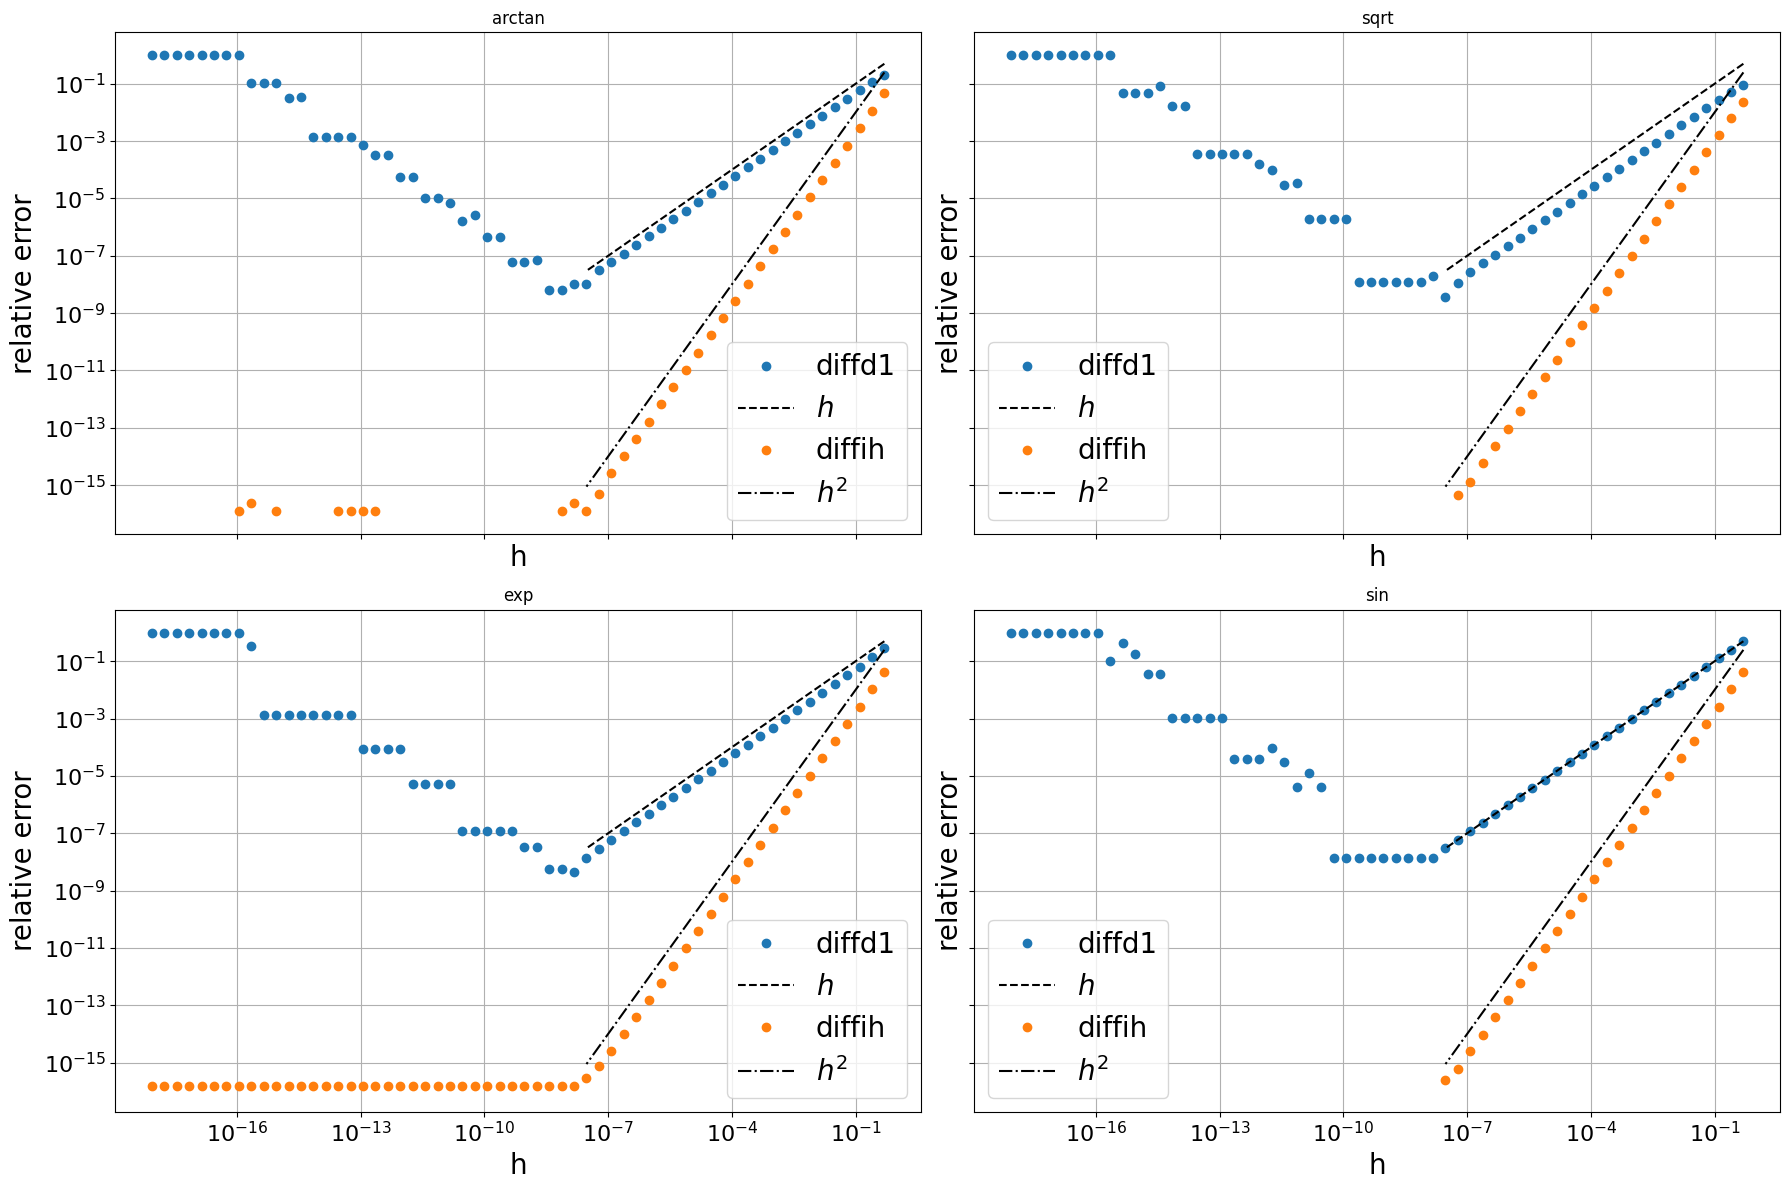

In [19]:
%matplotlib inline
import numpy as np

# def of dv
def diffd1(f,x, h0):
    nit = 60 # max depth of iterations
    h = np.zeros(nit); h[0] = h0 # width of diff. quot
    y = np.zeros(nit)
    y[0] = ( f(x+h[0]) - f(x) )/h[0]
    for k in range(1,nit):
        h[k] = h[k-1]*0.5
        y[k] = ( f(x+h[k]) - f(x) )/h[k]
    return y, h
    
# complex imaginary step
def diffih(f,x, h0):
    nit = 60 # max depth of iterations
    h = np.zeros(nit); h[0] = h0 # width of diff. quot
    y = np.zeros(nit)
    y[0] = np.imag( f(x+1.j*h[0]) )/h[0]
    for k in range(1,nit):
        h[k] = h[k-1]*0.5 #h gets decreased by half each iteration
        y[k] = np.imag( f(x+1j*h[k]) )/h[k]
    return y, h

# printing routine
def prnt(pname,f,df,x,h0, ax):
    print(f.__name__)
    z,h = pname(f, x, h0)
    rerr = abs(z - df(x)) / df(x)
    ax.loglog(h,rerr, '.', label=pname.__name__)
    kt = 25
    if pname.__name__ == 'diffd1':
        ax.loglog(h[:kt], h[:kt], 'k--', label='$h$')
    else:
        ax.loglog(h[:kt], h[:kt]**2, 'k-.', label='$h^2$')
    print('Relativer Fehler:')
    print(  rerr )
    print('-----------')
    

x = 1.1 # where to evaluate
h0 = 0.5 # staring step

datan = lambda x: 1/(1+x**2)
dsqrt = lambda x: 0.5*x**-0.5
dcos = lambda x: -np.sin(x)

lof = [np.arctan, np.sqrt, np.exp, np.sin]#, np.cos]
lod = [datan, dsqrt, np.exp, np.cos]#, dcos]

from matplotlib import pyplot as plt
params = {'axes.labelsize': 20,
          'figure.figsize' : (18,12),
          #'text.fontsize': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 16,
          'lines.markersize'  : 12,
          'ytick.labelsize': 16#,
          #'text.usetex': True
          }
plt.rcParams.update(params)


fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
axsp = axs.flatten()
for f, df, ax in zip (lof,lod, axsp):
    print('diffd1')
    prnt(diffd1,f,df,x,h0,ax)
    print('diffih')
    prnt(diffih,f,df,x,h0,ax)
    ax.grid(True, which="both")
    ax.set_xlabel('h')
    ax.set_ylabel('relative error')
    ax.set_title(f.__name__)
    ax.legend()
    fig.tight_layout()

plt.show()



##### **Richardson Acceleration**

Another way to avoid cancelation is to use a Method that converges faster so that there is no case where cancelation can occur.

The idea is that we can approxiamate the derivative faster and faster with d(h). By letting halving h and ubstracting the old d(h) we get a faster convergence of the error.

![Richardson1](Images/Chapter0-Richardson1.PNG)
![Richardson2](Images/Chapter0-Richardson2.PNG)
![Richardson3](Images/Chapter0-Richardson3.PNG)
![Richardson4](Images/Chapter0-Richardson4.PNG)

Then by defining d1(h) = to the last equation we can keep on repeating this process.

![Richardson5](Images/Chapter0-Richardson5.PNG)

So we can build the follwing Richardson Schema for computing the derivative:


![Richardson6](Images/Chapter0-Richardson6.PNG)
![Richardson7](Images/Chapter0-Richardson7.PNG)


diffd2:
arctan
Relativer Fehler:
[4.26282997e-02 1.10903127e-02 2.79679012e-03 7.00663879e-04
 1.75256877e-04 4.38198894e-05 1.09553265e-05 2.73885379e-06
 6.84714843e-07 1.71178747e-07 4.27947077e-08 1.06990433e-08
 2.67468749e-09 6.68724164e-10 1.68238325e-10 4.36193609e-11
 3.41969508e-12 1.94995614e-11 4.48199039e-11 8.38190267e-11
 8.38190267e-11 8.38190267e-11 8.38190267e-11 8.38190267e-11
 2.14204192e-09 1.97440386e-09 6.25848770e-09 6.25848770e-09
 6.25848770e-09 5.96046448e-08 5.96046448e-08 5.96046448e-08
 4.67300415e-07 4.67300415e-07 1.64031982e-06 1.64031982e-06
 1.00708008e-05 1.00708008e-05 1.00708008e-05 5.73730469e-05
 5.73730469e-05 3.27148437e-04 7.51953125e-04 1.40625000e-03
 1.40625000e-03 1.40625000e-03 1.40625000e-03 1.40625000e-03
 3.31250000e-02 3.31250000e-02 1.05000000e-01 1.05000000e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
-----------
diffRichardsonV:
arctan
Relativer Fehle

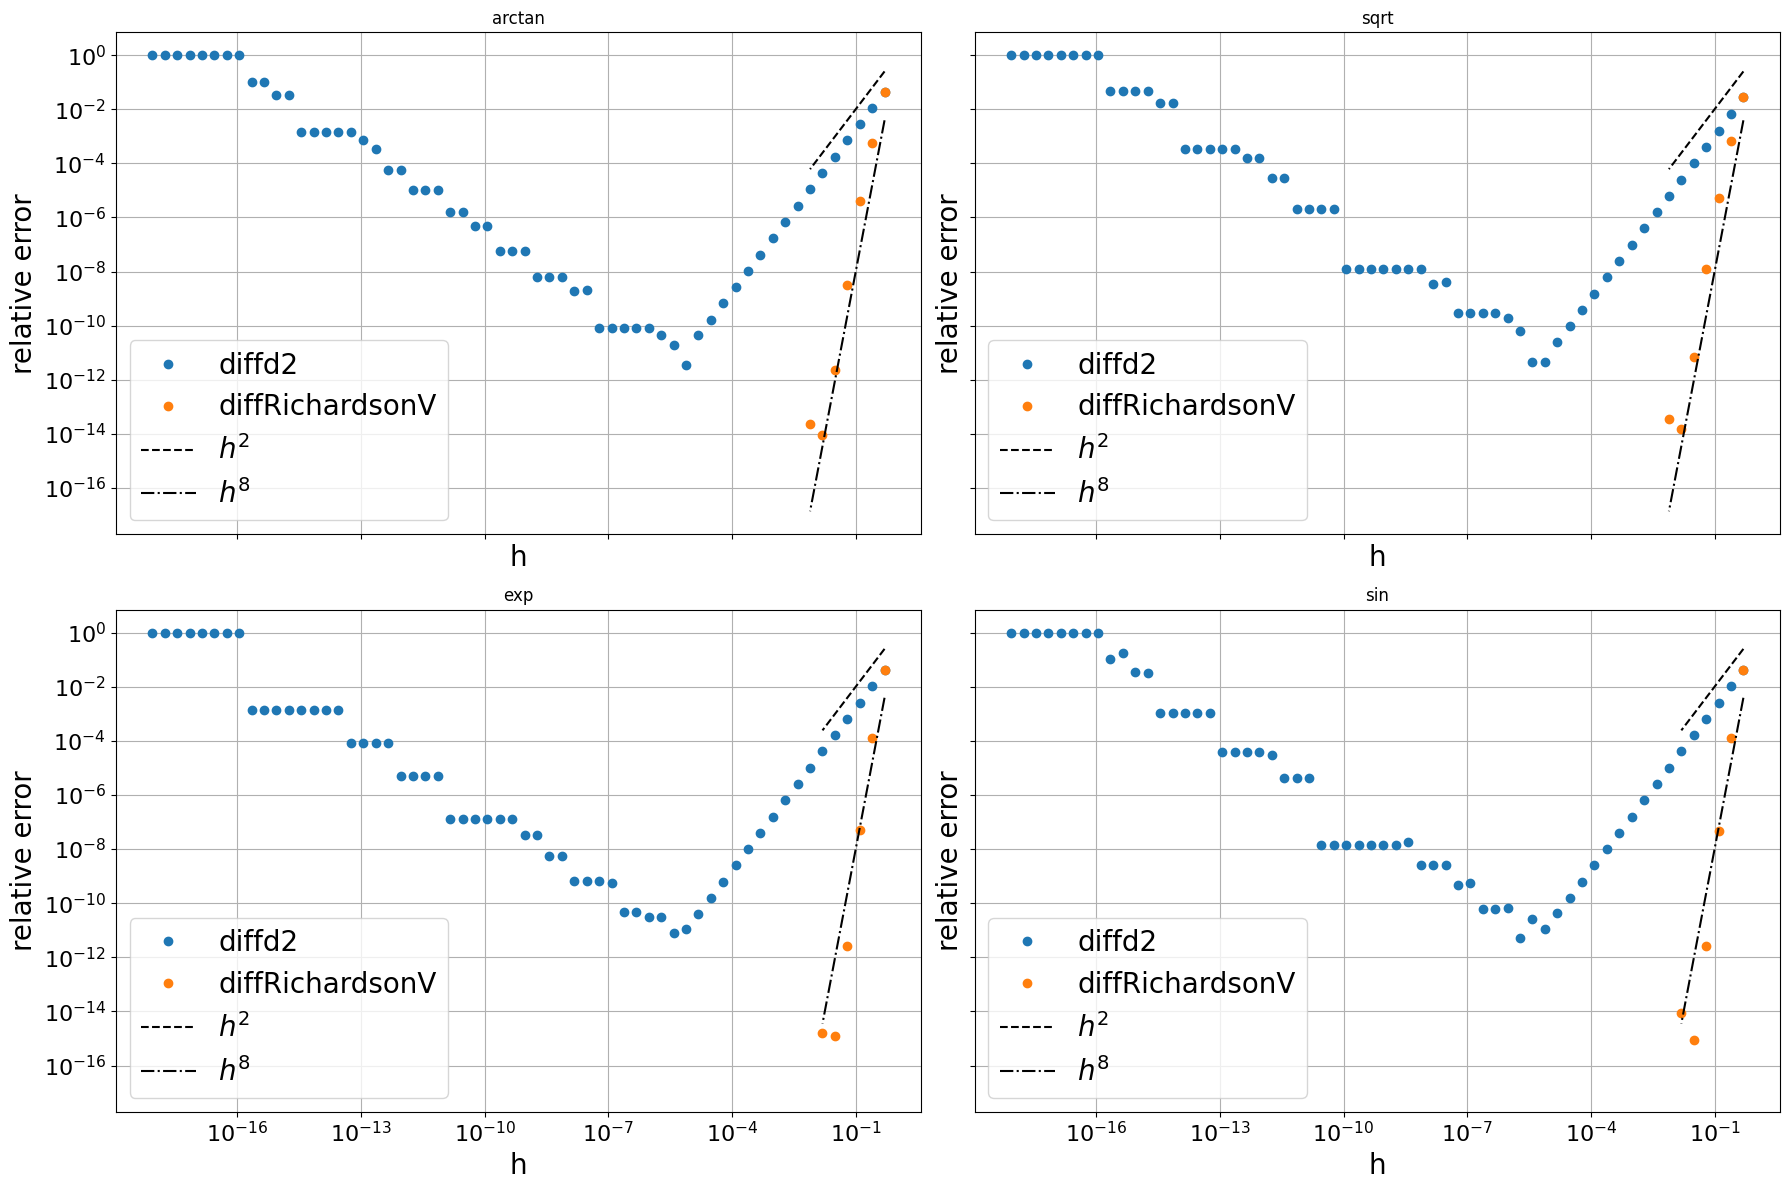

In [20]:
import numpy as np
from matplotlib import pyplot as plt
params = {'axes.labelsize': 20,
          'figure.figsize' : (18,12),
          #'text.fontsize': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 16,
          'lines.markersize'  : 12,
          'ytick.labelsize': 16#,
          #'text.usetex': True
          }
plt.rcParams.update(params)

# standard symmetric divided differences of order 2
def diffd2(f,x, h0):
    nit = 60 # max depth of iterations
    h = h0/2**np.arange(nit)
    fp, fm = f(x+h), f(x-h)
    y = (fp-fm)/2/h
    return y, h
    
    

# Richardson extrapolation; fixed level for vectorisation
def diffRichardsonV(f,x, h0, rtol=1e-12, atol=1e-12):
    nit = 30 # max depth of iterations
    # TODO: implement here the symmetric divided differences of order 2
    h = h0/2**np.arange(nit)
    fp, fm = f(x+h), f(x-h)
    y = (fp-fm)/2/h
    for j in range(1,nit):
      fact = 4**j
      y[j:] = (fact*y[j:]- y[j-1:-1])/(fact-1)
      errest= abs(y[j]-y[j-1])
      if errest < rtol*abs(y[j]) or errest< atol:
        break
      
    return y[:j+1], h[:j+1] # return the last computed io to show cancellation
    
# printing routine
def prnt(pname,f,df,x,h0, ax):
    print(f.__name__)
    z, h = pname(f, x, h0)
    rerr = abs(z - df(x)) / df(x)
    ax.loglog(h,rerr, '.', label=pname.__name__)
    print('Relativer Fehler:')
    print( rerr )
    print('-----------')
    return z,h
    
x = 1.1 # where to evaluate
h0 = 0.5 # staring step

datan = lambda x: 1/(1+x**2)
dsqrt = lambda x: 0.5*x**-0.5
dcos = lambda x: -np.sin(x)

lof = [np.arctan, np.sqrt, np.exp, np.sin, np.cos]
lod = [datan, dsqrt, np.exp, np.cos, dcos]

fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
axsp = axs.flatten()

for f, df, ax in zip (lof,lod, axsp):
    print('diffd2:')
    prnt(diffd2,f,df,x,h0,ax)
    print('diffRichardsonV:')
    z, h = prnt(diffRichardsonV,f,df,x,h0,ax)
    # one more to get the h
    ax.loglog(h,h**2, 'k--', label='$h^2$')
    ax.loglog(h,h**8, 'k-.', label='$h^8$')
    ax.grid(True, which="both")
    ax.set_xlabel('h')
    ax.set_ylabel('relative error')
    ax.set_title(f.__name__)
    ax.legend()
    
fig.tight_layout()
plt.show()

 #### **Python Various**

Short Intro do Numpy, Vectorization and useful python tips.


In [21]:

x = np.arange(10) # 0,1,2..
print(x[0], x[-1], x[-2]) # 0, 9,8
print(x.reshape(2,5)) # copy with 2 rows and 5 values per row
print(x) # no change
x.shape = (2,5) 
print(x) # changed!
print(x[0]) # not returns an entire row of x since reshaped!
x[0][2] = -2; print(x) # chnaged since x[0] returns view not copy
x[0,2] = -1 # same as above, more efficient
# Types are important!
x[0, 2] = 2.5; print(x[0,2]) # downcast to int thus to 2

y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print([y[1:7:1]]) #([1, 3, 5]) # prints 1 to 7 (excluded 7 in jumps of 1)
print(y[-2:10], y[-2:]) # [8, 9]
print(y[-3:3:-1]) # starts 7 and goes until 3 backwards 7,6,5,4
print(y[2],y[2:3]) # number vs slice of array

print(x[1:10:5, ::-1])
obj = (slice(1, 10, 5), slice(None, None, -1)); print(x[obj])

x = np.array([[[1],[2],[3]], [[4],[5],[6]]])
print(x[:, np.newaxis, :, :].shape) # is synomim to:
print(x[:, None, :, :].shape)

x = np.arange(10, 1, -1); print(x)

y = np.arange(35).reshape(5, 7); print(y)
print(y[np.array([0, 2, 4]), np.array([0, 1, 2])]) # rows 0,2 ,4 indexed at columns 0,1,2 respectively.
print(y[np.array([0, 2, 4]), 1] ) # elements [0,1], [2,1], [4,1]
print(y[np.array([0, 2, 4])]) # copies of the rows 0,2,4 of y

x = np.arange(12).reshape(4,3); print(x)
rows = np.array([[0,0], [3,3]])
cols = np.array([[0,2], [0,2]])

print( x[rows, cols] )
# shorter via broadcasting:
rows = np.array([0, 3])
cols = np.array([0, 2])

print( rows[:, np.newaxis] )
print( x[rows[:, np.newaxis], cols] )

print( x[np.ix_(rows, cols)] )
print( np.ix_(rows, cols) )

0 9 8
[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4]
[[ 0  1 -2  3  4]
 [ 5  6  7  8  9]]
2
[array([1, 2, 3, 4, 5, 6])]
[8 9] [8 9]
[7 6 5 4]
2 [2]
[[9 8 7 6 5]]
[[9 8 7 6 5]]
(2, 1, 3, 1)
(2, 1, 3, 1)
[10  9  8  7  6  5  4  3  2]
[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]]
[ 0 15 30]
[ 1 15 29]
[[ 0  1  2  3  4  5  6]
 [14 15 16 17 18 19 20]
 [28 29 30 31 32 33 34]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  2]
 [ 9 11]]
[[0]
 [3]]
[[ 0  2]
 [ 9 11]]
[[ 0  2]
 [ 9 11]]
(array([[0],
       [3]]), array([[0, 2]]))


#### **Skalarproducts, Kron, Einsum**


In [22]:
a= np.array([1.,2.,3.])
b= np.array([4.j,5.j,6.j])
print(a*b)
print(np.tensordot(b, a, axes=1))

print(np.outer(b,a)) # bxa matrix
print(np.outer(b.conj(),a))

print(np.tensordot(b, a, axes = -1)) # tensor product of b and a
print(np.tensordot(b.conj(), a, axes = -1)) # tensor product

print( np.einsum('i,i',b,a) ) # np.dot(b,a)
print( np.einsum('i,j',b,a) ) # outer product
print( np.einsum('i,i->i',b,a) ) # b*a

A, B = np.array([[1,2],[3,4]]), np.array([[10,11],[12,13]])
print(A, B)
print( np.outer(A,B) )
print( np.kron(A,B) ) # Kroneker product
print( np.einsum('ij,kl->ikjl',A,B).reshape(4,4) ) # Kroneker product
print( np.einsum('ik,kj->ij',A,B) ) # A @ B
print( np.einsum('ik,kj->ji',A,B) ) # (A @ B).T
print( np.einsum('ii->i',A) ) # diag(A)
print( np.einsum('ii->',A) ) # trace(A)
x = np.array([-1., -2.])
print( np.einsum('ij,j->i',A,x) ) # A @ x
print( np.einsum('i,ij->j',x,A) ) # x.dot(A)
print( np.einsum('s,st,t->',x,A,x) ) # x.dot(A @ x) quadratic form

def fastmultiply(D,A): # faster computation by using broadcasting
  
  X = D.diagonal()[:,np.newaxis]* A
  return(X)

def fastmultiply(A,B,x): #for ranked matrices with known p<<n
    n, p = A.shape
    y = np.zeros(n)
    for k in range(p):
        v = B[:,k] * x
        s = v[::-1].cumsum()[::-1]
        y += A[:,k] * s
    return(y)

def fastKmultiply(A,B,x): #Kronecker Product
    n, k = A.shape[1], B.shape[1]
    assert x.size == n*k, 'size mismatch'
    xx = x.reshape(n,k)
    Z = np.tensordot(xx, B.T, axes = 1)
    y = np.dot(A,Z)
    return y.ravel()

[0. +4.j 0.+10.j 0.+18.j]
32j
[[0. +4.j 0. +8.j 0.+12.j]
 [0. +5.j 0.+10.j 0.+15.j]
 [0. +6.j 0.+12.j 0.+18.j]]
[[0. -4.j 0. -8.j 0.-12.j]
 [0. -5.j 0.-10.j 0.-15.j]
 [0. -6.j 0.-12.j 0.-18.j]]
[[0. +4.j 0. +8.j 0.+12.j]
 [0. +5.j 0.+10.j 0.+15.j]
 [0. +6.j 0.+12.j 0.+18.j]]
[[0. -4.j 0. -8.j 0.-12.j]
 [0. -5.j 0.-10.j 0.-15.j]
 [0. -6.j 0.-12.j 0.-18.j]]
32j
[[0. +4.j 0. +8.j 0.+12.j]
 [0. +5.j 0.+10.j 0.+15.j]
 [0. +6.j 0.+12.j 0.+18.j]]
[0. +4.j 0.+10.j 0.+18.j]
[[1 2]
 [3 4]] [[10 11]
 [12 13]]
[[10 11 12 13]
 [20 22 24 26]
 [30 33 36 39]
 [40 44 48 52]]
[[10 11 20 22]
 [12 13 24 26]
 [30 33 40 44]
 [36 39 48 52]]
[[10 11 20 22]
 [12 13 24 26]
 [30 33 40 44]
 [36 39 48 52]]
[[34 37]
 [78 85]]
[[34 78]
 [37 85]]
[1 4]
5
[ -5. -11.]
[ -7. -10.]
27.0


### **Chapter 1 - Interpolation**

Interpolation of functions is a very common task. The task is given by Datapoints xi and Values yi of the f(xi). The goal is to find a good f' so that f ~ f'. With the conditions that for the given xi, f'(xi)= yi. 

F is lies in a infinite Vector Space V wth functions of different smoothness. What we look for is an approximation of f  by f' with f' being in an linear subspace V' of V with V' being finite with dimension n.

![Interpolation1](Images/Chapter1-Interpolation1.PNG)

With the above bj(x) building a Basis of V' ie. span{b1,...,bn}= V'


Example of such Basis Function are:

![Basisfunctions](Images/Chapter1-Basisfunctions.PNG)


Calculations with so called Monomial Basis with, can determine given k+1 points any polynomial of dimension k. The problem is the following:

![P(X)](Images/Chapter1-Interpolation2.PNG)

![MatrixPoly](Images/Chapter1-Interpolation3.PNG)

To solve this matrice one can use np.polyfit. This method though is very error prone and so better methods have emerged. One of these methods is the so called Horner-Schema:


![HornerSchema](Images/Chapter1-InterpolationHornerSchema.PNG)

Numpy uses polyval(p,x) with an array p(an, an-1...,a0) that hold the interpolation values, that implements the HornerSchema.
Polyfit often returns error prone coefficient but polyval often returns good approxiamation in the Monomial Basis.


##### **Newton-Basis and divided differences**

When using the Monomial-Basis, if new points are added the Interpolation Polynomial has to be computed again from scratch. This is very computation heavy and in fields such as Physics not feasable. With the Newton-Basis we can include new Datapoints without "losing" information about the old ones. Example for 2 and 3 points: 

![Newton1](Images/Chapter1-NewtonBasis1.PNG)

![Newton2](Images/Chapter1-NewtonBasis2.PNG)

The Newton Basis is the following:

![Newton3](Images/Chapter1-NewtonBasis3.PNG)

What we have to do now is to get the coefficient β1...βn for the polynomial.

The Matrix has 0 when x = x0,x1,...xn-1 for Nn(x) (multiplication with 0 occurs there)

![Newton4](Images/Chapter1-NewtonBasis4.PNG)

Furthermore we can see that results from smaller indices are needed again for the later ones. This leads to the method of "*divided differences*" that utilizes this finding. The divided differences are the following:

![DividedDiff1](Images/Chapter1-DividedDiff1.PNG)

If the given points x are equidistant with a distance of h the formula simplifies to:

![DividedDiff2](Images/Chapter1-DividedDiff2.PNG)

And finally, we can read the coefficients βj with βj = y(x0,x1,...xj) to complete out Newton Polynomial.

![DividedDiff3](Images/Chapter1-DividedDiff3.PNG)

'divdiff_sqw' ran 4 times. Best time: 0.319657 secs.
rec:
rec: 0.301773100043647  seconds
'divdiff' ran 4 times. Best time: 0.005115 secs.
vec: 0.005114999949000776  seconds
The vectorised version is  6249.411597355927  percent faster than the sequetial
The vectorised version is  5899.76741060572  percent faster than the recursive
'divdiff' ran 4 times. Best time: 0.000062 secs.
'evalNewton' ran 4 times. Best time: 0.000098 secs.


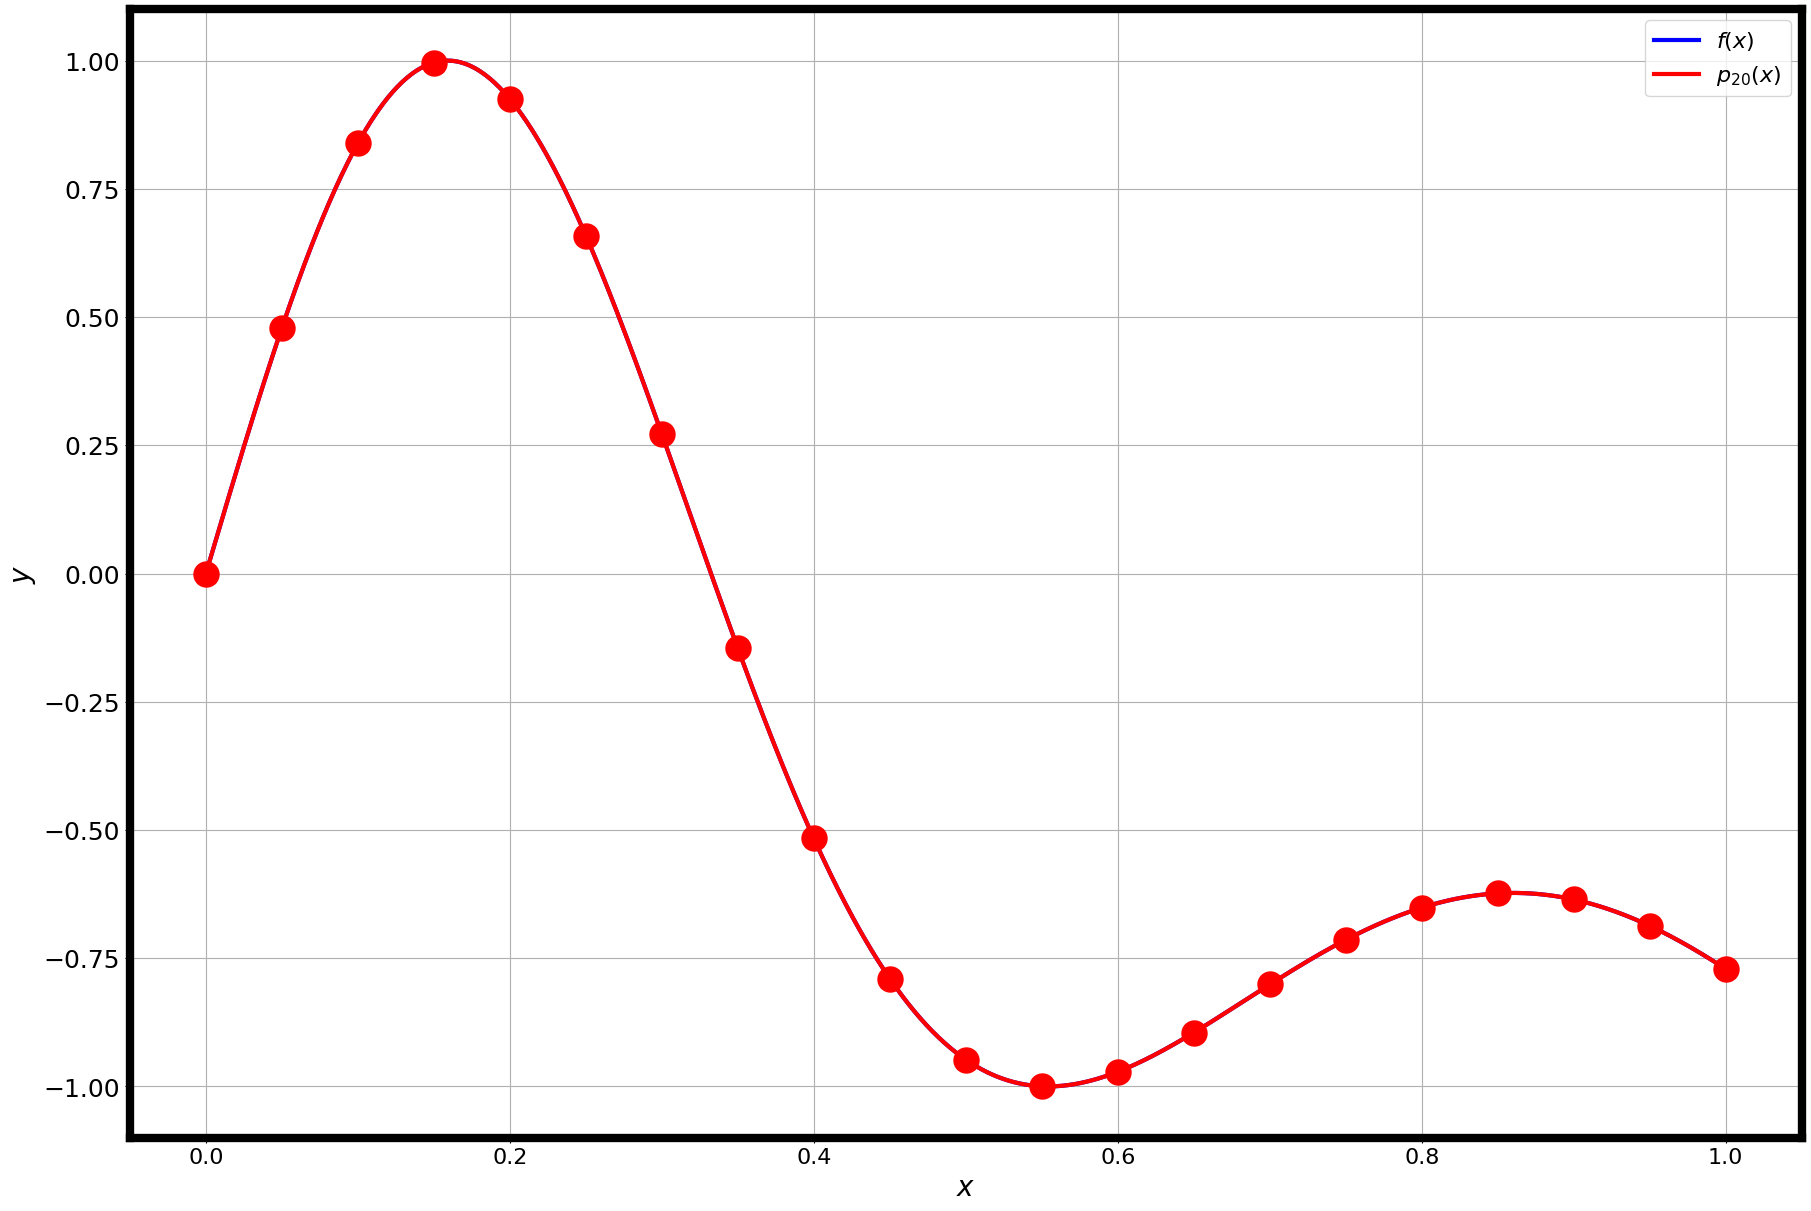

In [23]:
import numpy as np
import time
import copy
from functools import wraps


def time_it_pro(repetitions=3):
    """
    A decorator factory that measures function execution time.

    It runs the function multiple times, finds the minimum execution time,
    and stores it in a 'min_time' attribute on the decorated function.
    It also ensures the original input data is not modified.

    Args:
        repetitions (int): The number of times to run the function
                             to find the minimum execution time.
    """
    if not isinstance(repetitions, int) or repetitions <= 0:
        raise TypeError("Repetitions must be a positive integer.")

    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            run_times = []
            last_result = None

            for _ in range(repetitions):
                # Create a fresh deep copy for EACH repetition
                args_copy = copy.deepcopy(args)
                kwargs_copy = copy.deepcopy(kwargs)
                
                start_time = time.perf_counter()
                last_result = func(*args_copy, **kwargs_copy)
                end_time = time.perf_counter()
                
                run_times.append(end_time - start_time)
            
            # Find the minimum time and store it as an attribute on this wrapper
            min_run_time = min(run_times)
            wrapper.min_time = min_run_time
            
            print(
                f"'{func.__name__}' ran {repetitions} times. "
                f"Best time: {min_run_time:.6f} secs."
            )
            
            # Return the result from the last execution
            return last_result

        # Initialize the attribute to avoid an AttributeError if the function is never called
        wrapper.min_time = None
        return wrapper
    return decorator

# --- Example Usage ---

# Use the decorator by calling it with the number of repetitions
#@time_it_pro(repetitions=5)
#  Access the stored minimum time directly from the function's attribute
# CAUTION: it does not work for a recursive function but those are anyway "bad style in python"



nrEXP = 4
# -------- start plotting settings ----------------
import matplotlib.pyplot as plt
params = {'axes.labelsize': 20,
          'figure.figsize' : (18,12),#(36,24),#(18,12),
          'axes.titlesize': 16,
          'legend.fontsize': 16,
          'xtick.labelsize': 16,
          'lines.markersize'  : 18,
          'axes.linewidth' : 6,
          'lines.linewidth': 3,
          'ytick.labelsize': 18#,
          #'text.usetex': True
          }
plt.rcParams.update(params)
plt.rcParams['figure.constrained_layout.use'] = True
import matplotlib.ticker as plticker

# -------- end plotting settings ----------------

# (a) sequentielle Berechnung der Newton Koeffizienten
@time_it_pro(repetitions=nrEXP)
def divdiff_sqw(x,y):
    """
    x = node set (mutually different)
    y = nodal values, will be overwritten: no copy
    Returns the coefficients of the polynomial in Newton basis
    """
    z = y.copy()
    n = y.shape[0]

    
    for i in range(0,n):
        j = i-1
        while j >= 0: 
            z[j] = (z[j+1] - z[j]) / ( x[i] - x[j] )
            j -= 1
        y[i] = z[0]
    return(y)

    # TODO: implement here the serial versio

# (b) vectorisierte Berechnung der Newton Koeffizienten
@time_it_pro(repetitions=nrEXP)
def divdiff(x,y):


    """
    x = node set (mutually different)
    y = nodal values, will be overwritten: no copy
    Returns the coefficients of the polynomial in Newton basis
    vectorized version: fastest possible
    """   
    # TODO: implement here the vectorized version
    n = len(x)
    for j in range(1,n):
        y[j:n]= (y[j:n]-y[j-1:n-1])/(x[j:n]-x[:n-j])
    return y

# (c) rekursive Berechnung der Newton Koeffizienten
# DO NOT USE the above decorator for recursive functions
def divdiff_rec(x, y):
    """
    x = node set (mutually different)
    y = nodal values, will be overwritten: no copy
    Returns the coefficients of the polynomial in Newton basis
    uses recursion
    """

    # TODO: implement here the recursive  version
    n = y.shape[0] - 1
    
    # Recursive implementation
    if n > 0:
        y[0:n] = divdiff_rec(x[0:n], y[0:n])
        for j in range(0,n):
            y[n] = (y[n] - y[j]) / (x[n] - x[j])

    return y

# (d) effiziente Auswertung des Netwon Intrepolationspolynom
@time_it_pro(repetitions=nrEXP)
def evalNewton(x, dd, xx):
    """
    Evaluiert das Newton-Polynom

    Input: x  ... Stuetzstellen
           dd ... dividierte Differenzen
           xx ... auswertungspunkte

    Output: yy ... Newton-Polynom ausgewertet an xx
    """
    # TODO: implement here a vectorized version
    r = 0*xx + dd[-1]
    n= len(dd)
    for i in range(n-2,-1,-1):
        r = r*(xx-x[i])+ dd[i]
    return r
    
if __name__ == "__main__":

    """
    # if you want to check correctness, test with the following small example
    x = np.array([1., 2., 3., 4., 5., 6.])
    y = np.array([2., 4., 6., 5., 8., 2.])

    # expected result:
    # [ 2.00000   2.00000   0.00000  -0.50000   0.41667  -0.25000 ]

    print('x=',x)
    print('y=',y)
    # and uncomment the commands  print(w) below
    # and comment out the large data set
    """

    # a large set of data fortime measurements
    x = 1.*np.arange(1,10**3) # some nodes
    y = 2.*np.sin(x) # some values
    
    yc = y.copy() # without this y is destroyed
    w = divdiff_sqw(x, yc)#; print(w)
 
    print('rec:')
    ts = []
    for k in range(nrEXP):
        yc = y.copy()
        start = time.perf_counter()
        w = divdiff_rec(x, yc)
        end = time.perf_counter()
        #print(w)
        ts.append(end-start)
    rec = min(ts)    
    print('rec:', rec, ' seconds')
    
    yc = y.copy()
    w = divdiff(x, yc)#; print(w)
    print('vec:', divdiff.min_time,' seconds')
    
    print('The vectorised version is ', 100*divdiff_sqw.min_time/divdiff.min_time, ' percent faster than the sequetial')   
    print('The vectorised version is ', 100*rec/divdiff.min_time, ' percent faster than the recursive')
    # a visual check of correctness....
    n = 20
    x = np.linspace(0,1,endpoint=True, num=n+1)
    f = lambda x: np.sin(10*x*np.cos(x))
    yx = f(x)
    y = yx.copy()
    dd = divdiff(x, y)
    N = 1000
    t = np.linspace(0,1,endpoint=True, num=N+1)


    yt = evalNewton(x, dd, t)

    plt.figure()
    plt.plot(t, f(t), "-b", label=r"$f(x)$")
    plt.plot(x, yx, "or")
    plt.plot(t, yt, "-r", label=r"$p_{20}(x)$")
    plt.grid(True)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.legend()
    plt.show()

##### **Lagrange and barycentric Interpolationformulas**

The error for the last method (Newton) was depended on the choice of anchor points chosen. In this step we change our approach and define a new Basis that lets us investigate the error p(x)- p'(x) easier. The Lagrange Polynomials are given by the following formula:

![LagrangePoly1](Images/Chapter1-LagrangePoly1.PNG)

The Lagrange Polynomials at anchor points (x0,y0)... (xi,yi) build a Basis for the Polynomials Pn.

![LagrangePoly2](Images/Chapter1-LagrangePoly2.PNG)

The following properties of the Lagrange Polynomials are clear:

![LagrangePoly3](Images/Chapter1-LagrangePoly3.PNG)

From this we can derive the barycentric Formula with 
Ln(x)= (x-x0)*(x-x1)*(x-x2)...*(x-xn) and λk:

![LagrangePoly4](Images/Chapter1-LagrangePoly4.PNG)

We can reweire the polynomial p(x):

![LagrangePoly5](Images/Chapter1-LagrangePoly5.PNG)

And after defining the constant Polynomial 1 we can simplify to the barycentric formula:

![LagrangePoly6](Images/Chapter1-LagrangePoly6.PNG)

![LagrangePoly7](Images/Chapter1-LagrangePoly7.PNG)

This formula is invariant in the intervall [a,b] with a= x0 < x1... xn<b

The evaluation at a point x in the Intervall is very stable and can be executed in O(n) if the λk have been compued in advance (O(n^2)). For special anchor points, the so called Chebyshev Nodes(Next Chapter) we can calculate the λk even faster O(1). 

The Lebesque Constant is used to find an upperbound of the error in a given intervall [a,b] with anchor points x0...xn woth li being the Lagrange Polynomial.

![LagrangePoly8](Images/Chapter1-LagrangePoly8.PNG)

![LagrangePoly9](Images/Chapter1-LagrangePoly9.PNG)

So the error is only dependant on the choice of our anchor points. For example for equidistant points we can see that the error is pretty bad:

![LagrangePoly10](Images/Chapter1-LagrangePoly10.PNG)

The also explains the Runge Phenomenon, by observing the Runge-Fucntion: f(x)= 1/(1+x^2) at the interval [-5,5].
If we use equdistant points, we can see that at the endpoints, there is strong Oscillation that leads to a big error. What is even more astonishing, is the fact that by increasing the polynomial degree, the error gets even worse!

![LagrangePoly11](Images/Chapter1-LagrangePoly11.PNG)





##### **Chebyshev Interpolation**

To avoid the above mentione derror Phenomena we want to chose our anchor points wisely. For this we will use the Chebyshev Nodes.

We define Chebyshev Polynomials of first and second order.

![ChebyshevPoly1](Images/Chapter1-ChebyshevPoly1.PNG)

![ChebyshevPoly2](Images/Chapter1-ChebyshevPoly2.PNG)

THe following properties hold for the Chebyshev Polynomials:

![ChebyshevPoly3](Images/Chapter1-ChebyshevPoly3.PNG)

The n+1 Chebyshev Nodes x0,...,xn in [-1,1] are given by the Zeropoints of Tn+1(x)(First Order):

![ChebyshevPoly4](Images/Chapter1-ChebyshevPoly4.PNG)

The Chebyshev Extrema n-1 (x0,...,xn-2) in [-1,1] are the Extrema of Tn(x). At the same time they are the zeropoints of Un-1(x) (second Order Cheby.Polynom) when including endpoints: 

![ChebyshevPoly5](Images/Chapter1-ChebyshevPoly5.PNG)

With the error approximation derived in the last Section, we can see that the error is minimal between the Chebyshev Nodes (Zero points of Tn(x)).

![ChebyshevPoly6](Images/Chapter1-ChebyshevPoly6.PNG)

The extrema of T2n(x) include the Zero Points (Between each Extrema is a Zero Point) this Chebyshev Extrema are more commonly used in connection with Fourier Transform (see next Chapter).

 Now if we go back to the Runge Function we can compare the error and can see that not only is the error less than the Equidistant points, but by increasing the Grade, we get less and less error!

 ![ChebyshevPoly7](Images/Chapter1-ChebyshevPoly7.PNG)

 ![ChebyshevPoly8](Images/Chapter1-ChebyshevPoly8.PNG)







C:\Users\Admin\AppData\Local\Temp\ipykernel_13232\1038816067.py:65: RankWarning: Polyfit may be poorly conditioned
  coeffs_polyfit = np.polyfit(t,y, len(y)-1)


Coefficients of the polynomial are:
[-2.71034215e+08  3.99166324e+09 -5.34670945e+07 -5.12805108e+09
  3.11414195e+08  2.64668969e+09 -1.86667312e+08 -6.16302497e+08
  3.62646645e+07  4.30787957e+06  6.92598396e+06  3.88758604e+07
 -5.61255524e+06 -1.22793890e+07  1.52399449e+06  2.11880674e+06
 -2.46937684e+05 -2.38963620e+05  2.65889082e+04  1.85004530e+04
 -1.96456520e+03 -9.92801087e+02  9.98585520e+01  3.64822297e+01
 -3.43660022e+00 -8.89121583e-01  7.76141531e-02  1.01356245e+00
 -1.10066016e-03 -1.16985102e-04  9.31066457e-06  1.04857700e+06
 -4.35152403e-08 -8.27432082e-10  2.46859422e-11  1.00000000e+00]
(Euklidian) Error in the coefficients is: 7058774844.531817


C:\Users\Admin\AppData\Local\Temp\ipykernel_13232\1038816067.py:88: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


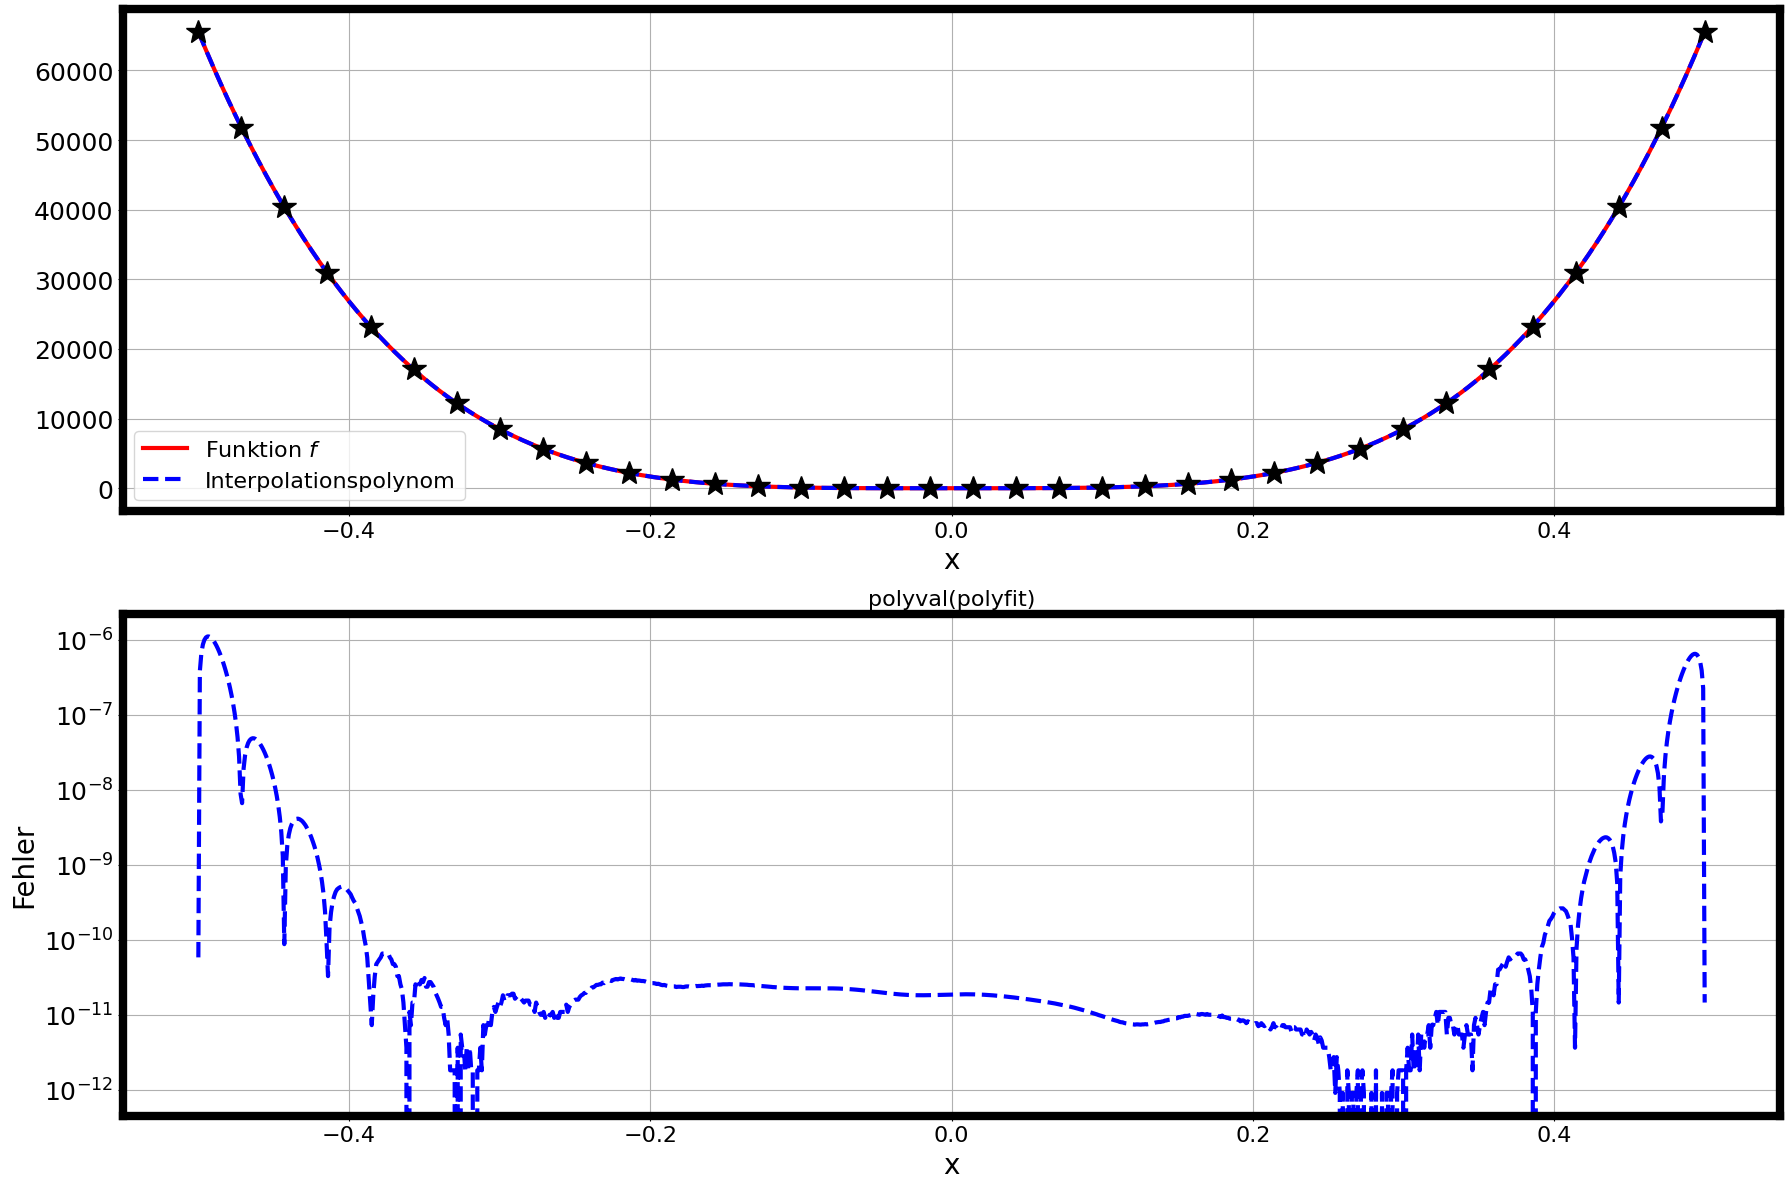

C:\Users\Admin\AppData\Local\Temp\ipykernel_13232\1038816067.py:109: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


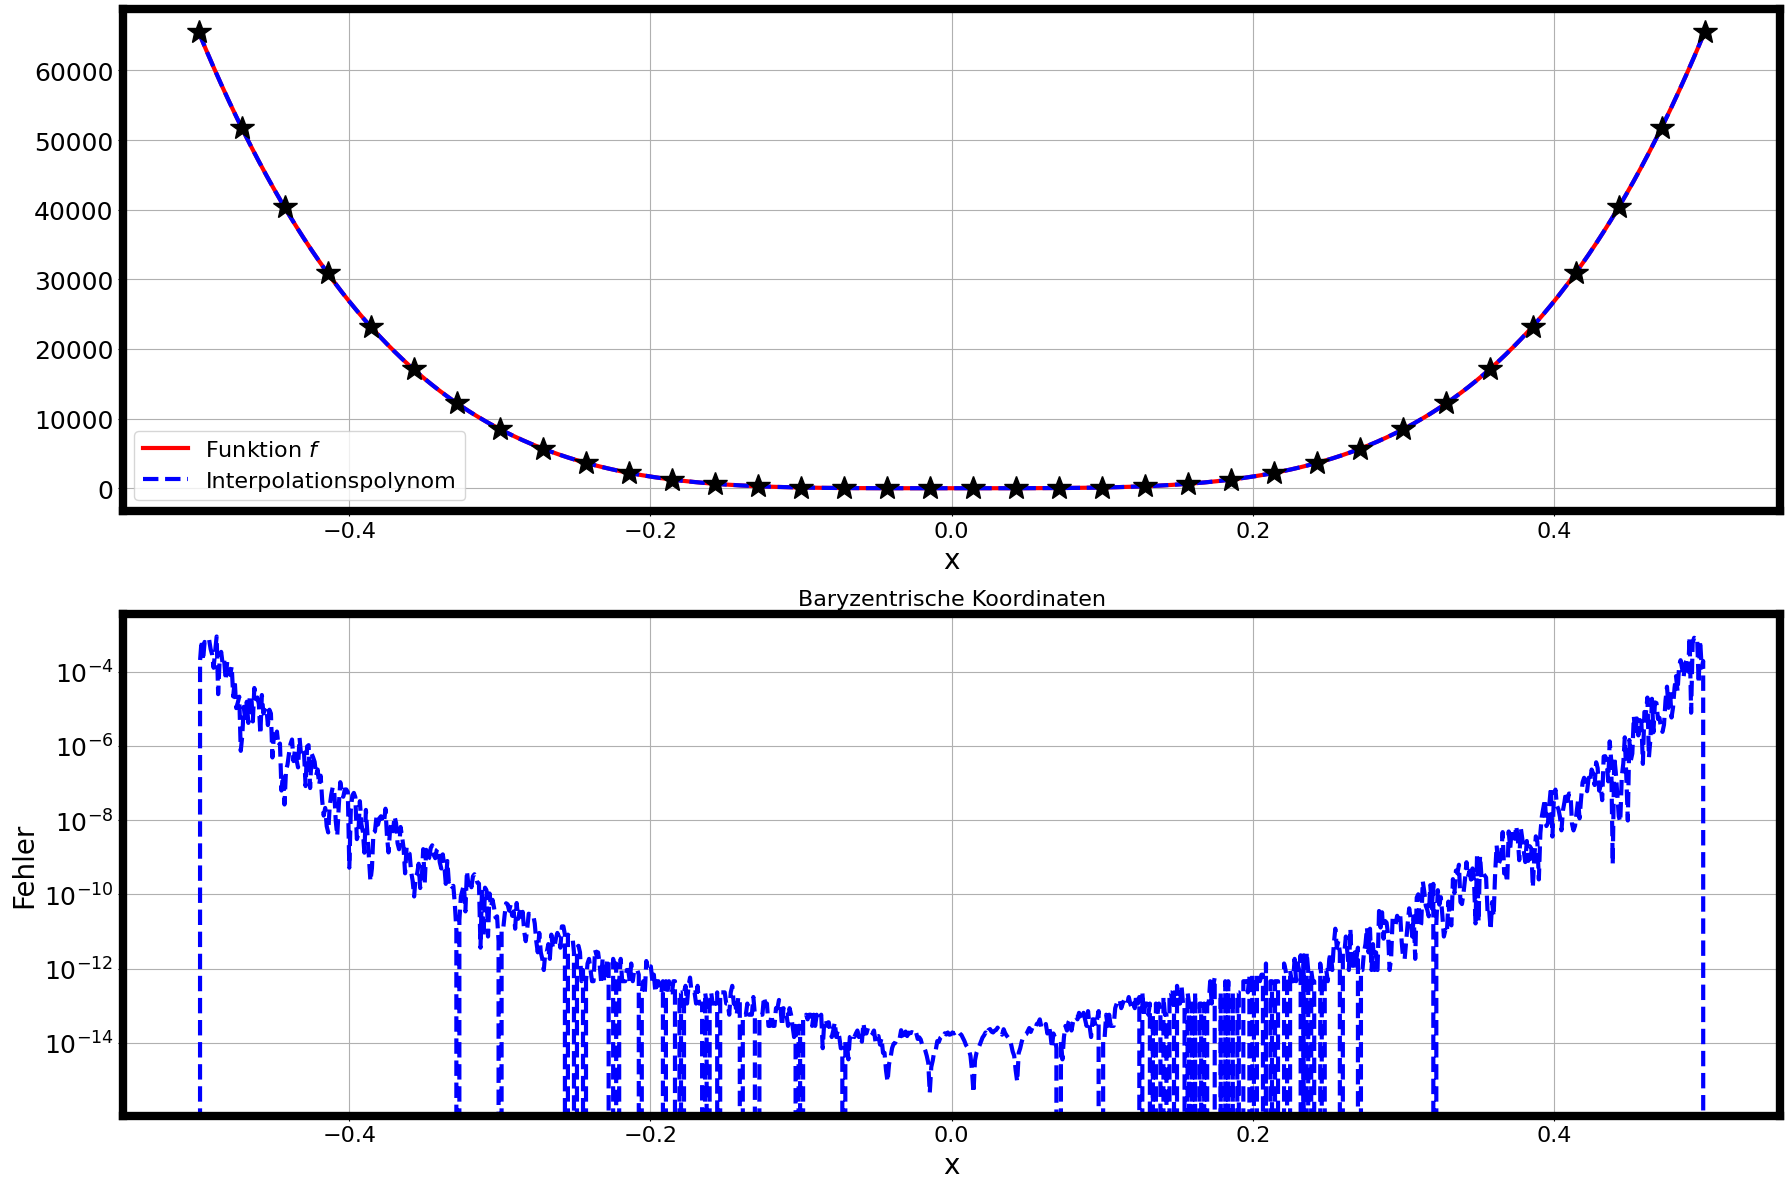

C:\Users\Admin\AppData\Local\Temp\ipykernel_13232\1038816067.py:144: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


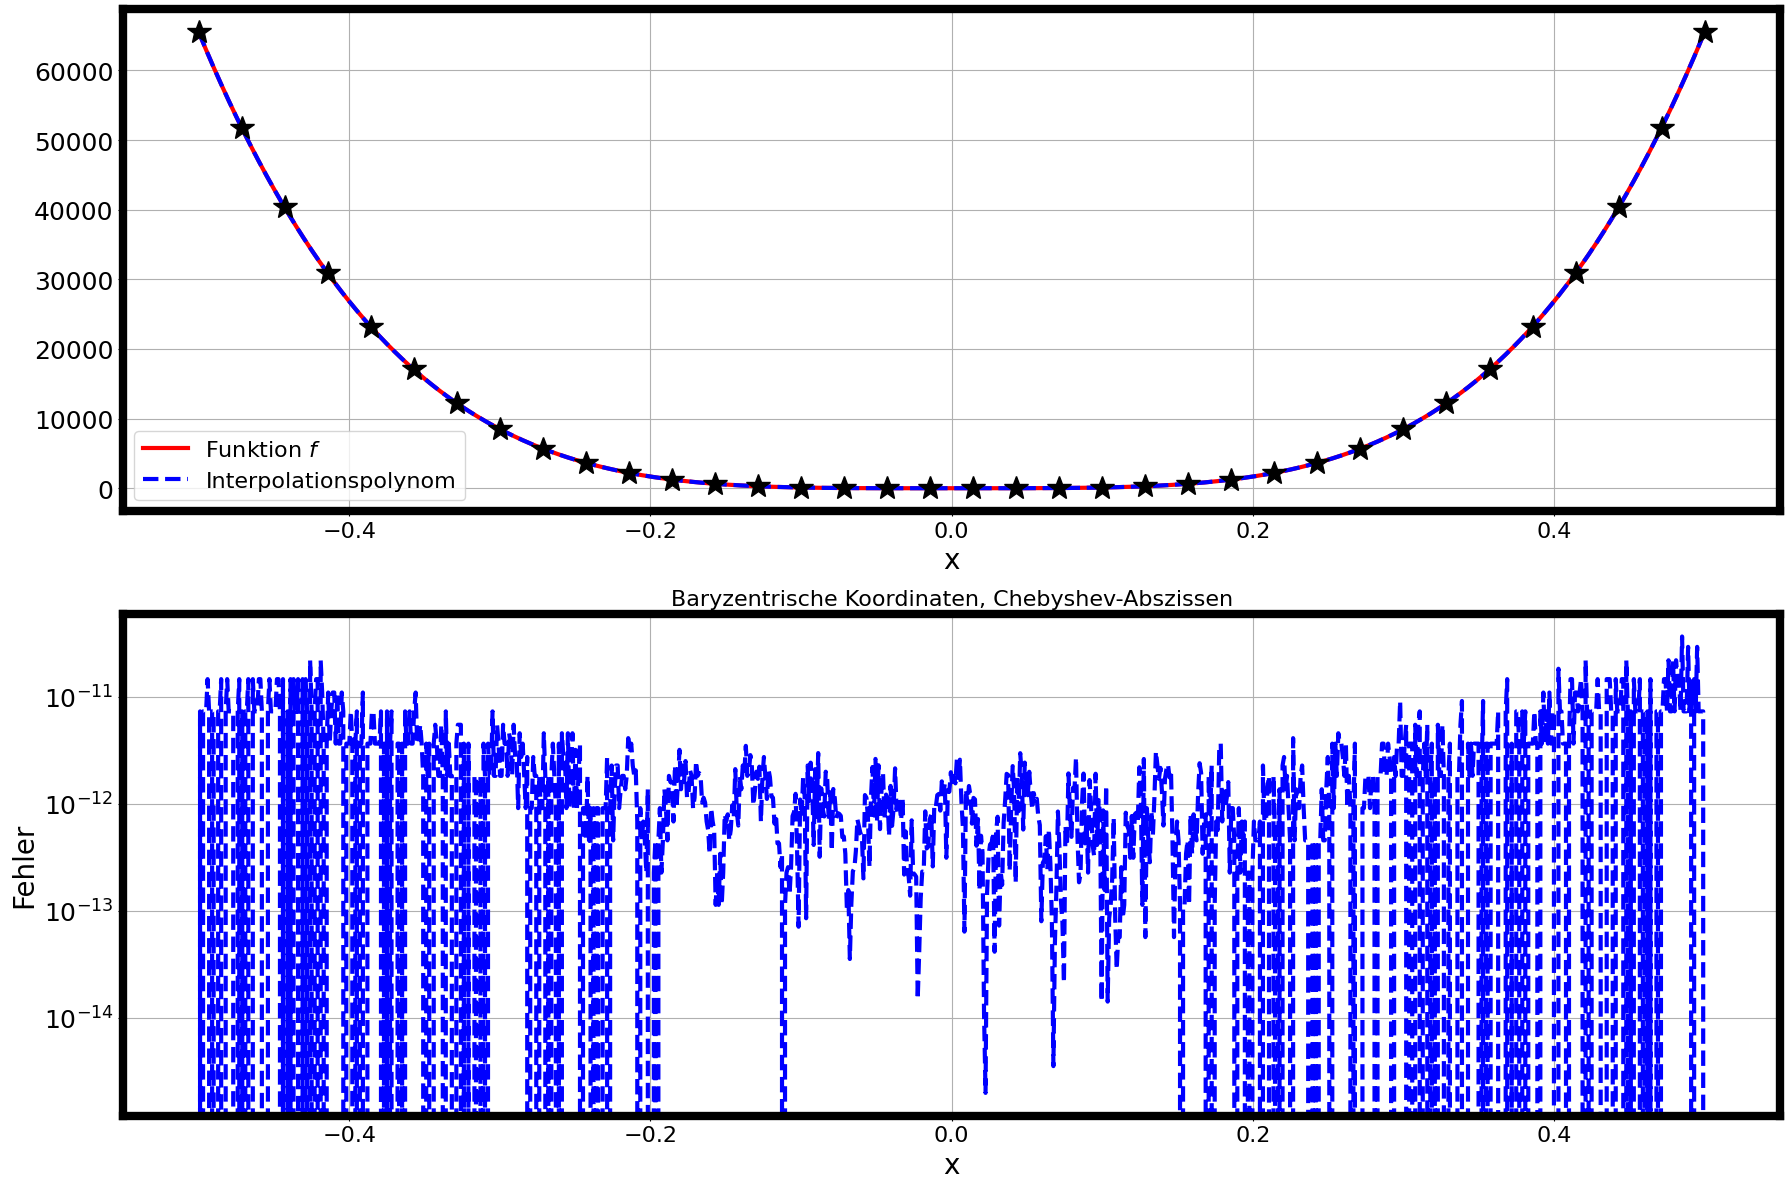

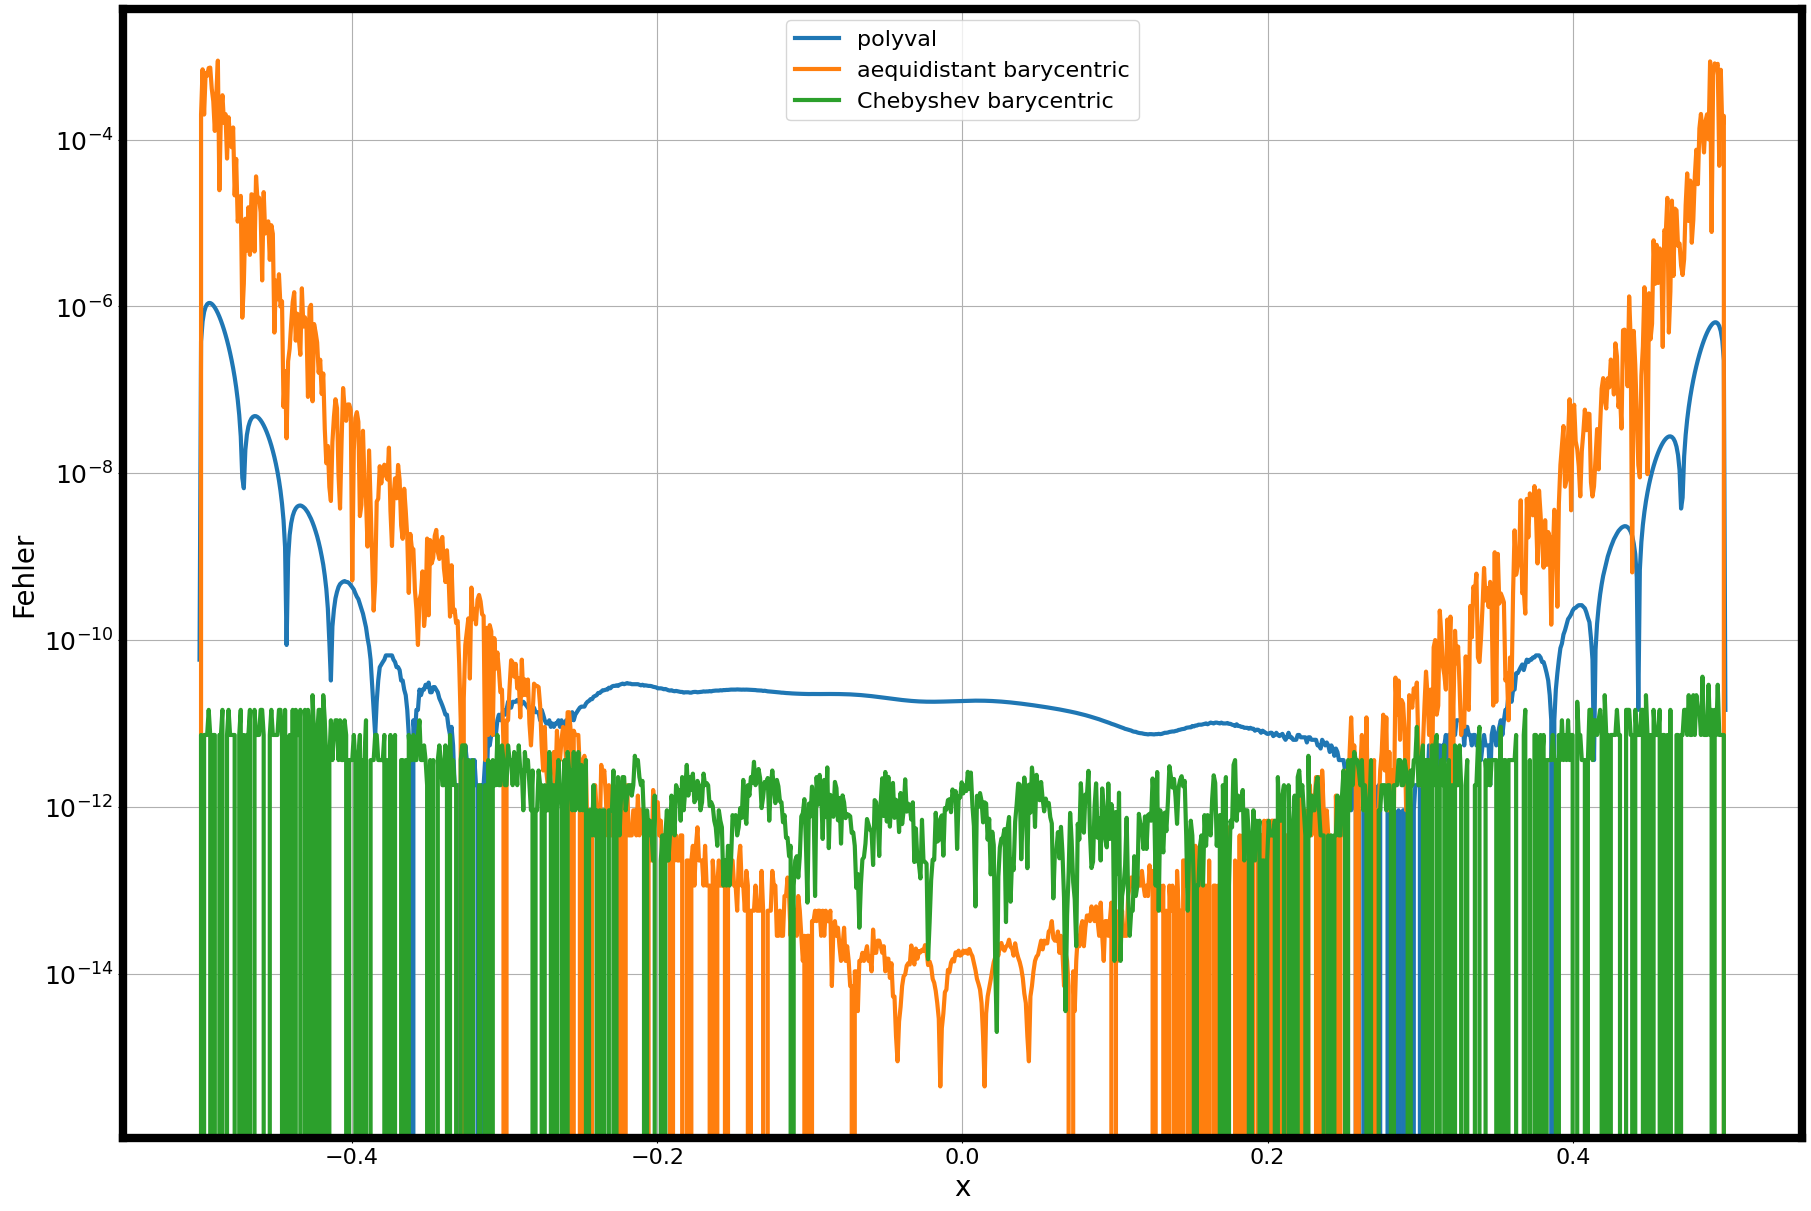

In [24]:
import numpy as np
import matplotlib.pyplot as plt


def barycentric_weights(x):
    """
    Berechne die baryzentrischen Gewichte zu den Stuetzstellen x

    Input: x ... Stuetzstellen
    Output: barweight ... baryzentrischen Gewichte
    """
    n = len(x)
    barweight = np.ones(n)
    #TODO: implementieren Sie hier die Berechnung der baryzentrischen Gewichte

    for k in range(n):
       barweight[k] = 1/(np.prod(x[k]-x[:k])*np.prod(x[k]-x[k+1:]))

    return barweight


def interp_barycentric(x, y, barweight, xx):
  """
  Purpose: berechnet das Interpolations-Polynom p(xx) mittels
           baryzentrischer Interpolationsformel mit Stueztstellen x,
           Stuetzwerten y und Gewichte barweight

  Input: x         ... Stuetzstellen
         y         ... Stuetzwerte
         barweight ... baryzentrische Gewichte zu x
         xx        ... xx

  Output: pxx ... Interpolationspolynom ausgewertet an xx
  """
  pxx = np.zeros_like(xx) # oder pxx = 0.*xx

  # TODO: implementieren SIe hier die Berechnung von pxx
  for i, xxi in enumerate(xx): 
    z = xxi - x
    j = z == 0
    if np.any(j):
            pxx[i] = y[j][0]
    else:
            mu = barweight / z
            pxx[i] = np.dot(mu, y) / np.sum(mu)
  return pxx

if __name__ == "__main__":
    # Polynom aus der Aufgabenstellung
    rc = np.zeros(9)
    rc[0] = 1.; rc[4] = 1+ 2**20; rc[8] = 1.
    f = lambda t: rc[0] + rc[4] * t**4 + rc[8] * t**8
    # Stuetzstellen
    t = np.linspace(-0.5, 0.5, 36)
    # gemessene Werte
    y = f(t)
    # Auswertungspunkte
    x = np.linspace(t[0], t[-1], 1000)
    # Exakte Funktionswerte für Vergleiche
    fvs = f(x)
    

    # a) Polynominterpolation mit polyfit und polyval
    #TODO: berechenen Sie hier die Koeffizienten via polyfit
    coeffs_polyfit = np.polyfit(t,y, len(y)-1)
    print("Coefficients of the polynomial are:")
    print(coeffs_polyfit)
    erc = np.sum( (np.flip(coeffs_polyfit)[:9] - rc)**2 ) + np.sum(np.flip(coeffs_polyfit)[9:]**2 )
    print("(Euklidian) Error in the coefficients is:", np.sqrt(erc))
    #TODO: werten Sie hier den Interpolationspolynom via polyval aus
    p = np.polyval(coeffs_polyfit, x)

    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(x, fvs, "r")
    plt.plot(x, p, "b--")
    plt.plot(t, f(t), "k*")
    plt.grid(True)
    plt.legend(["Funktion $f$", 'Interpolationspolynom'], loc="best")
    plt.xlabel("x")

    plt.subplot(2,1,2)
    plt.semilogy(x, abs(fvs - p), 'b--')
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("Fehler")
    plt.title('polyval(polyfit)')
    plt.tight_layout()
    plt.show()

    # b) Baryzentrische Formel
    plt.figure()
    plt.subplot(2,1,1)
    barweight = barycentric_weights(t)
    px = interp_barycentric(t, y, barweight, x)
    plt.plot(x, fvs, "r")
    plt.plot(x, px, "b--")
    plt.plot(t, f(t), "k*")
    plt.grid(True)
    plt.legend(["Funktion $f$", 'Interpolationspolynom'], loc="best")
    plt.xlabel("x")

    plt.subplot(2,1,2)
    plt.semilogy(x, abs(fvs - px), 'b--')
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("Fehler")
    plt.title('Baryzentrische Koordinaten')
    plt.tight_layout()
    plt.show()
    

    # c) Baryzentrische Gewichte fuer die Chebyshev Abszissen
    n = len(t)
    a = t[0]
    b = t[-1]
    # TODO: berechenen SIe die Chebyshev Abszissen in [a,b]
    xx = a + 0.5 * (b - a) * (np.cos(np.pi * np.arange(n) / (n - 1)) + 1.0)

    # Gewichte fuer die baryzentrische Interpolationsformel in den Chebychev-Abszissen
    barweight_cheby = np.ones_like(t) # oder 1. + 0.*t
    # TODO: berechenen Sie hier die baryzentrische Gewichte für die Chebyshev Abszissen
    barweight_cheby = (-1.0) ** np.arange(n)
    barweight_cheby[0] *= 0.5
    barweight_cheby[-1] *= 0.5
    # Auswertung des Interpolationspolynoms
    pxx = interp_barycentric(xx, f(xx), barweight_cheby, x)

    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(x, fvs, "r")
    plt.plot(x, pxx, "b--")
    plt.plot(t, f(t), "k*")
    plt.grid(True)
    plt.xlabel("x")
    plt.legend(["Funktion $f$", 'Interpolationspolynom'], loc="best")

    plt.subplot(2,1,2)
    plt.semilogy(x, abs(fvs - pxx), 'b--')
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("Fehler")
    plt.title('Baryzentrische Koordinaten, Chebyshev-Abszissen')
    plt.tight_layout()
    plt.show()
    

    # d) All errors in one picture
    plt.figure()
    plt.semilogy(x, abs(fvs - p), label='polyval')
    plt.semilogy(x, abs(fvs - px), label='aequidistant barycentric')
    plt.semilogy(x, abs(fvs - pxx), label='Chebyshev barycentric ')
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("Fehler")
    plt.legend(loc='best')
    plt.show()
    


The evaluation of the polynomial is given as follows: 

 ![ChebyshevPoly9](Images/Chapter1-ChebyshevPoly9.PNG)

 With the ck computed as follows: 

 
 ![ChebyshevPoly10](Images/Chapter1-ChebyshevPoly10.PNG)

 In total the computational time for ck is (n+1)^2 when done directly. With Fast Fourier Transform it is brought down to nlogn Operations. For the evaluation of the polynomial at a point x we can use the *Clenshaw* algorithm to speed it up.

 Let dn+2, dn+1 = 0. Given the weights ck we compute recursively:

![ChebyshevPoly11](Images/Chapter1-ChebyshevPoly11.PNG)

with p(x)=d0-x*d1 = 1/2(d0-d2).





<>:108: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
<>:116: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
<>:108: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
<>:116: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
C:\Users\Admin\AppData\Local\Temp\ipykernel_13232\1138396692.py:108: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
  plt.ylabel('Fehler $\epsilon_n$')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13232\1138396692.py:116: SyntaxWarning: "\e" is an invalid escape sequence. Such seq

Exponetielle Konvergenz: 0.820033**n


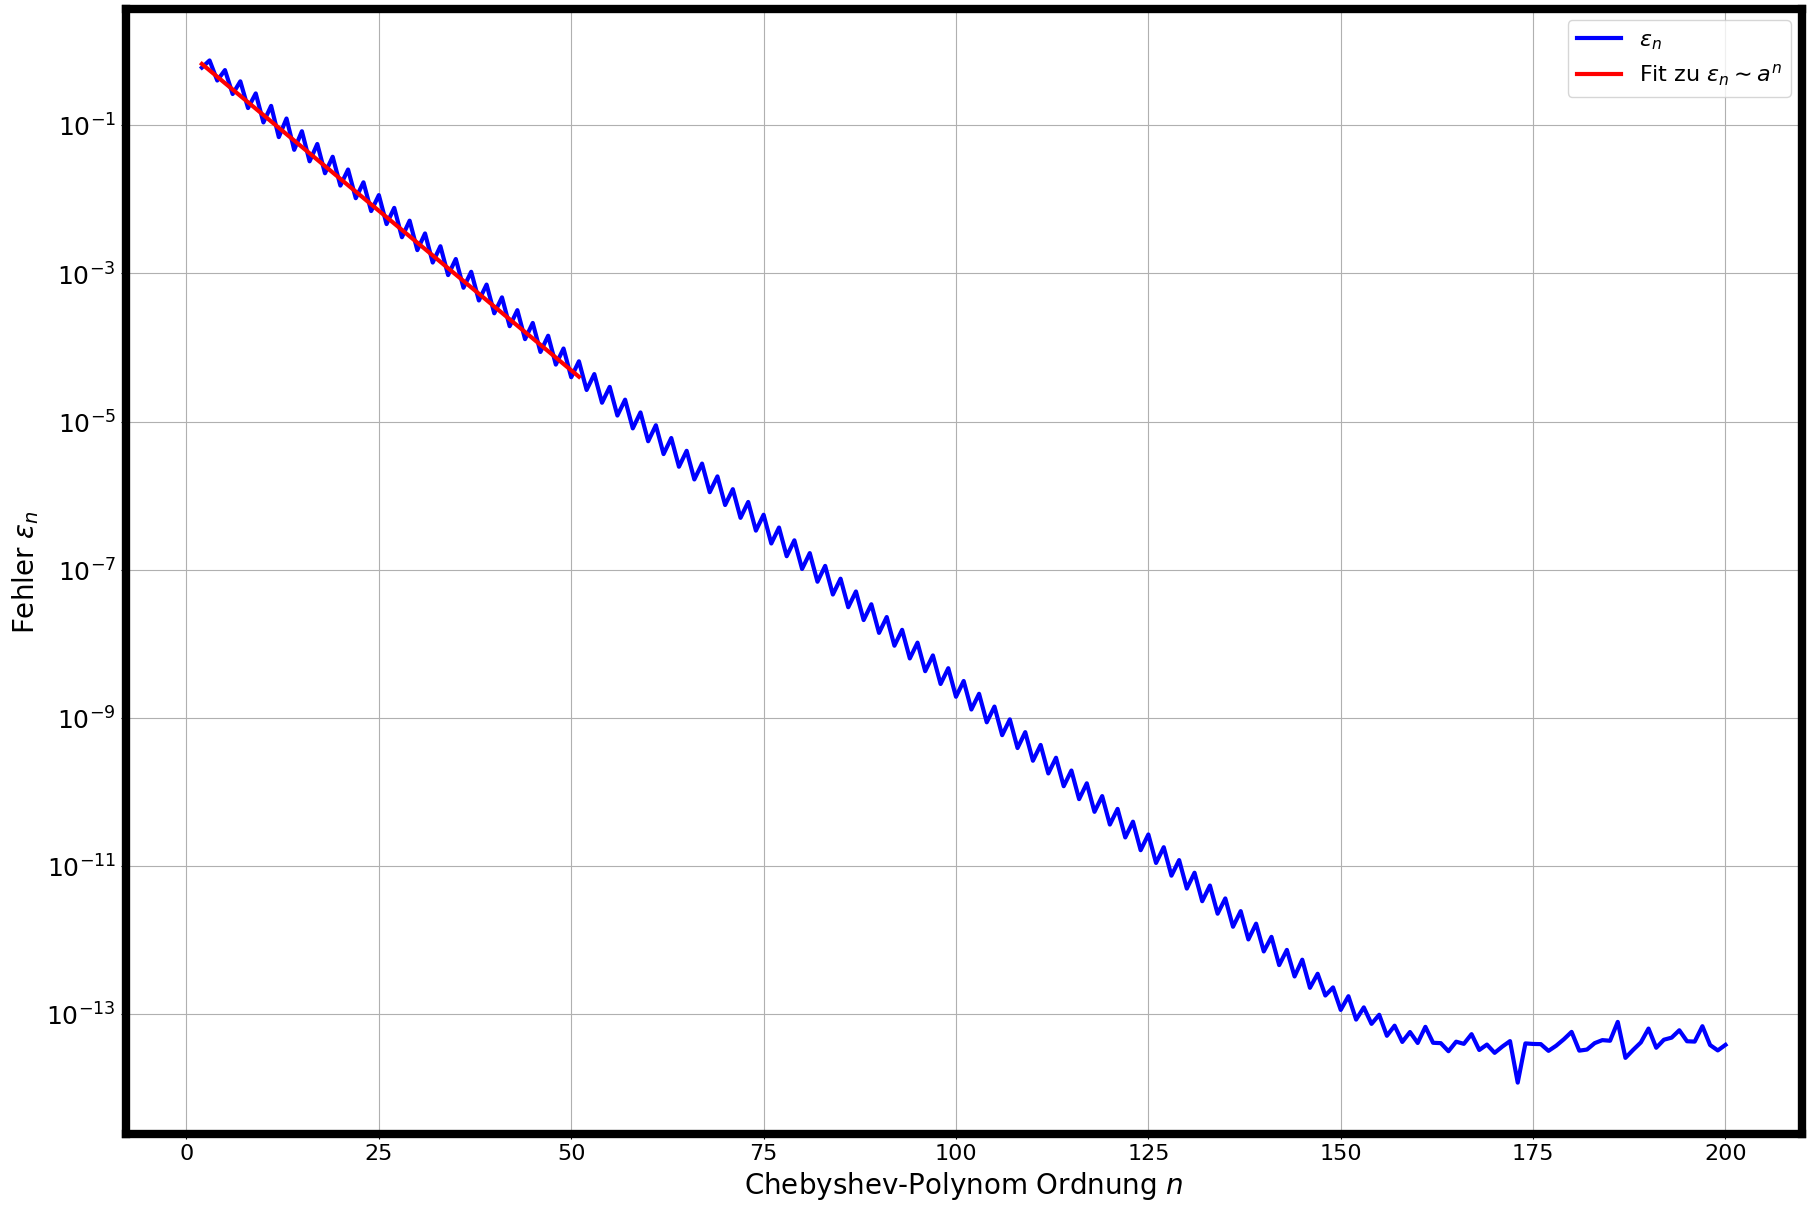

In [25]:
import numpy as np
from scipy.fft import ifft # for the efficient computation of the Chebyshev coefficients

# -------- start plotting settings ----------------
import matplotlib.pyplot as plt
params = {'axes.labelsize': 20,
          'figure.figsize' : (18,12),#(36,24),#(18,12),
          'axes.titlesize': 16,
          'legend.fontsize': 16,
          'xtick.labelsize': 16,
          'lines.markersize'  : 18,
          'axes.linewidth' : 6,
          'lines.linewidth': 3,
          'ytick.labelsize': 18#,
          #'text.usetex': True
          }
plt.rcParams.update(params)
plt.rcParams['figure.constrained_layout.use'] = True
import matplotlib.ticker as plticker
# -------- end plotting settings ----------------

# Clenshaw Algorithmus 
def clenshaw(a,x):
  # TODO: implementiere hier Clenshaw
    n = len(a)-1

    dkp2, dkp1, dk = np.zeros_like(x), np.zeros_like(x), np.zeros_like(x)

    for k in range(n,-1,-1):
        dk= a[k]-dkp2+2*x*dkp1
        dkp2 = dkp1
        dkp1 = dk


    y = dkp1 - x*dkp2
    return y
    
# Chebyshev Interpolation: code from future lecture, do not change
def chebexp(y):
    # degree of polynomial
    n = y.shape[0] - 1

    # create vector z by wrapping and componentwise scaling
    # r.h.s. vector
    t = np.arange(0, 2*n+2)
    z = np.exp(-np.pi*1.0j*n/(n+1.0)*t) * np.hstack([y,y[::-1]])

    # solve linear system with effor n*log(n)
    c = ifft(z)

    # recover beta
    t = np.arange(-n, n+2)
    b = np.real(np.exp(0.5j*np.pi/(n+1.0)*t) * c)

    # recover alpha
    a = np.hstack([ b[n], 2*b[n+1:2*n+1] ])
    return a

# anzahl stuetzstellen
n = 30

# Runge-Funktion Definition
f = lambda x: 1./(1. + 25.*x**2)

# berechne Chebyshev Stuetzstellen (Nullstellen von T^_{n+1})
x_cheby = np.cos((2.*np.r_[0:n+1]+1.)/(n+1)*np.pi/2.)

# f an Chebyshev Stuetzstellen: f(x_cheby)
fx_cheby = f(x_cheby)

# berechne Chebyshev Koeffizienten
a = chebexp(fx_cheby)

# Stuetzstellen und Funktionswerte zur Fehleranalyse
N  = 1000 # Anzahl Stuetzstellen zur Fehleranalyse
xx  = np.linspace(-1,1,N)
fxx = f(xx)

#
y = clenshaw(a,xx)

# berechne Fehlerfunktion err_n(x) fuer n=2, ..., n_max
n_max = 200
err = np.zeros(n_max-1)
for n in range(2,n_max+1):

    # berechne Chebyshev Stuetzstellen (Nullstellen von T^_{n+1})
    x_cheby = np.cos((2.*np.r_[0:n+1]+1.)/(n+1)*np.pi/2.)

    # f an Chebyshev Stuetzstellen: f(x_cheby)
    fx_cheby = f(x_cheby)

    # berechne Chebyshev Koeffizienten a_j: p(x) = a_0 + a_1*T_1(x) 
    #                                                    + a_2*T_2(x)
    #                                                    + ...
    #                                                    + a_n*T_n(x)
    a = chebexp(fx_cheby)

    # evaluiere Chebyshev an den Stuetzstellen zur Fehleranalyse
    p = clenshaw(a,xx)

    # berechne Fehler: err_n(x) = max(|f(xx_l) - p(xx_l)|) ~ ||f - p||_inf
    err[n-2] = np.max(np.abs(fxx - p))

# exponentielle Konvergenz?
plt.semilogy(list(range(2,n_max+1)),err,'b-')
plt.xlabel('Chebyshev-Polynom Ordnung $n$')
plt.ylabel('Fehler $\epsilon_n$')

# Fit: err ~ a^n
pfit = np.polyfit(list(range(2,51)),np.log10(err[2:51]),1)
print('Exponetielle Konvergenz: %f**n' % 10**pfit[0])
plt.semilogy(list(range(2,51+1)),(10**pfit[0])**list(range(2,51+1)),'r-')

# Legende
plt.legend([r'$\epsilon_n$','Fit zu $\epsilon_n \sim a^n$'])
plt.grid(True)

plt.show()   

### **Chapter 2 - Trigonometric Interpolation**


We have seen that functions can be approximated through Polynomials or Taylor Expansion. But since 1822 there is an even better Method. Fourier propossed that every function can be approxiamted through a periodic, and infinitely smooth function,and so the Trigonometric Polynomials emerged. They are defined as followed: 

![Trigo1](Images/Chapter2-Trigo1.PNG)

If the coefficients γ is equal its conjugate then the polynomial only takes real values. With a0 = 2*γ0 and aj = 2Re(γj) and bj = -2Im(γj), the polynomial can be rewritten.

![Trigo2](Images/Chapter2-Trigo2.PNG)

For functions in L^2(0,1):

![Trigo3](Images/Chapter2-Trigo3.PNG)

We can define the limit of its Fourier Series as followed: 

![Trigo4](Images/Chapter2-Trigo4.PNG)

![Trigo5](Images/Chapter2-Trigo5.PNG)

The functions exp(2πikt) build an Orthonormal Basis in L2. Often t -> f(t) is seen as the "time" domain of the function where as k -> f¨(k) is seen as the frequency domain of the function.
For real valued functions we can rewrite the Fourier Series: 

![Trigo6](Images/Chapter2-Trigo6.PNG)

The derivative can also easily be defined in the Trigonometric Space:

![Trigo7](Images/Chapter2-Trigo7.PNG)

For the characteristic Function we can define the Fourier Series as followed with c = π(a+b) and d = π(a-b)

![Trigo7.1](Images/Chapter2-Trigo7.1.PNG)

While the Fourier Series is very good for smooth functions, what we observe for "jumppoints" in the original function is the Gibbs Phenomena, our Fourier Polynomials oscillate and by adding more, we do not fix that problem.

![Trigo8](Images/Chapter2-Trigo8.PNG)

But if the original function f is continious and partially continious differentiable then the Fourier Series converges pointwise and uniformly.

Since the exact Fourier Coefficents can normally not be analytically computed so we choose the values tl =  l/N for l=0,1...,N-1 and approxiamate: 

![Trigo9](Images/Chapter2-Trigo9.PNG)

where F(0) = F(1). For smooth functions, the Fourier Series converges in N^2 this for those type of functions we can use short FourierSums. For non smooth ones we need to simply use larger Fourier Series. 
By assuming N even and the polynomials: 

![Trigo10](Images/Chapter2-Trigo10.PNG)

We can appoxiamte f(t) as followed: 

![Trigo11](Images/Chapter2-Trigo11.PNG)

![Trigo12](Images/Chapter2-Trigo12.PNG)


In [26]:
# Gibbs Phenomena 

from numpy import sin, pi, arange, where, exp, real, zeros
from pylab import plot, show, title, savefig

def plotFAchar(a=0.25,b=0.75,n=100):
    print(n)
    c = pi*(a+b)
    d = pi*(b-a)
    step1 = lambda x: where(x>0.25, 1., 0.)
    step2 = lambda x: where(x<0.75, 1., 0.)

    f = lambda x: step1(x)*step2(x)

    lev = 12
    N = 2**lev
    x = arange(0,N+1)*1.; x = x/N

    def exactFourierSeries(x,N): # Fourier series
        result = 1.j
        result *= zeros(x.size)
        
        # TODO: complete the code here
        
        z = 2*pi*x -c
        for k in range(1,N,1):
            result+= 2*sin(k*d) *  exp(1j*k*z)/k
        result /= pi
        result+= b-a

        return result
    




##### **Discrete Fouriertransform**

The N-th root of unity is defined as followed: ωN = exp(-2πi/N).

We can define the following properties of the exponential functions:

![DFT1](Images/Chapter2-DFT1.PNG)

From the last Subchapter we showed that we can approximate the Fourier Coefficients. Using that we can derive: 

![DFT2](Images/Chapter2-DFT2.PNG)

With this we see that the Fourier Polynomial exactly interpolates the values f(tl) when using equidistant points and the above approximation for the coefficients.

We can the use these ωN:= exp(2πi/N) to define a trigonemetric Basis in C^N with vectors v0...vN-1:

![DFT3](Images/Chapter2-DFT3.PNG)

This matrix V can be used to go from the sandardbasis to the trigonometric Basis and vice versa. Furthermore we can define that the yl-th Value in y is given by:

![DFT4](Images/Chapter2-DFT4.PNG)

We define the Fouriermatrix as the matrix that maps the coefficients in the Standard Basis to the coefficients of the Trigonometric Basis (without the factor 1/N):

![DFT5](Images/Chapter2-DFT5.PNG)

We can then define the Discrete Fourier Transform as the matrix F that results in the Fourier Coefficients c of a vector y:

![DFT6](Images/Chapter2-DFT6.PNG)

The common workflow using numpy is:

*fft.ftt:* Returns DFT starting at 0 : (c0,c1,c2,c3,c4...,c7)

![DFT7](Images/Chapter2-DFT7.PNG)

*fft.fftshift:* Shifts coefficient by setting 0 frequency in the middle (c4,c5,c6,c7,c0,c1,c2,c3)
        = (γ-4,γ-3,γ-2,γ-1,γ0,γ1,γ2,γ3).

![DFT8](Images/Chapter2-DFT8.PNG)








##### **Fast Fouriertransform**

The DFT Algorithm seems to work for a Vector in Cn is Complexity of O(N^2). But whats makes this the Fast Fourier Transform one of the most used algorithms is the fact that with a clever Divide and COnquer approach presented by Cooley Tukey the Runtime becomes O(nlogn)!

The idea is to use a vector of length 2^l so that after every "division" the problem becomes the following: 

![FFT1](Images/Chapter2-FFT1.PNG)

Ofcourse ists not always the case that the vector is of power of 2. For primenumbers the fft alorithm is slower but still optimized. For example by Zero Padding.


<>:46: SyntaxWarning: "\i" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\i"? A raw string is also an option.
<>:46: SyntaxWarning: "\i" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\i"? A raw string is also an option.
C:\Users\Admin\AppData\Local\Temp\ipykernel_13232\2291067164.py:46: SyntaxWarning: "\i" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\i"? A raw string is also an option.
  plt.ylabel('$L^{\infty}$ error', fontsize=20)


0.5
0.9
0.95
0.99


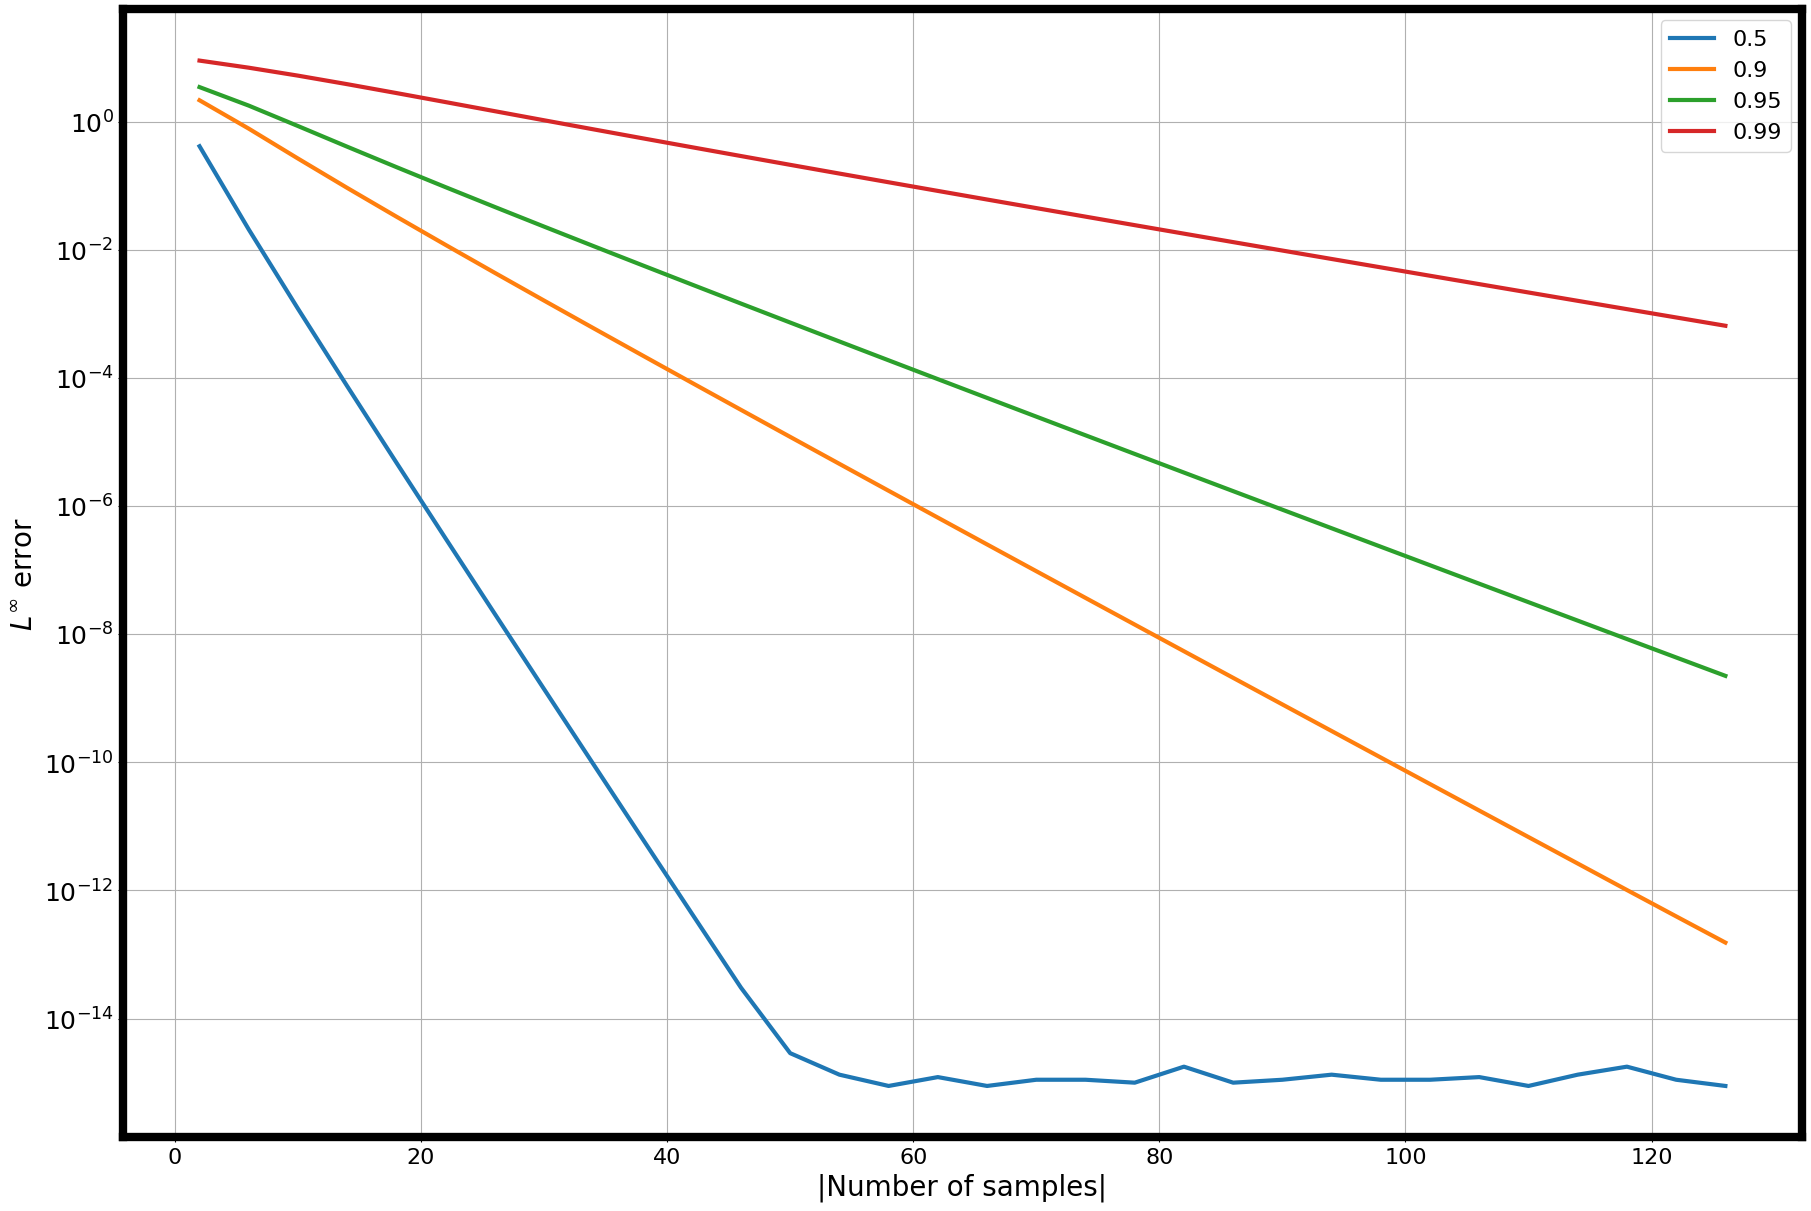

0.5
0.9
0.95
0.99


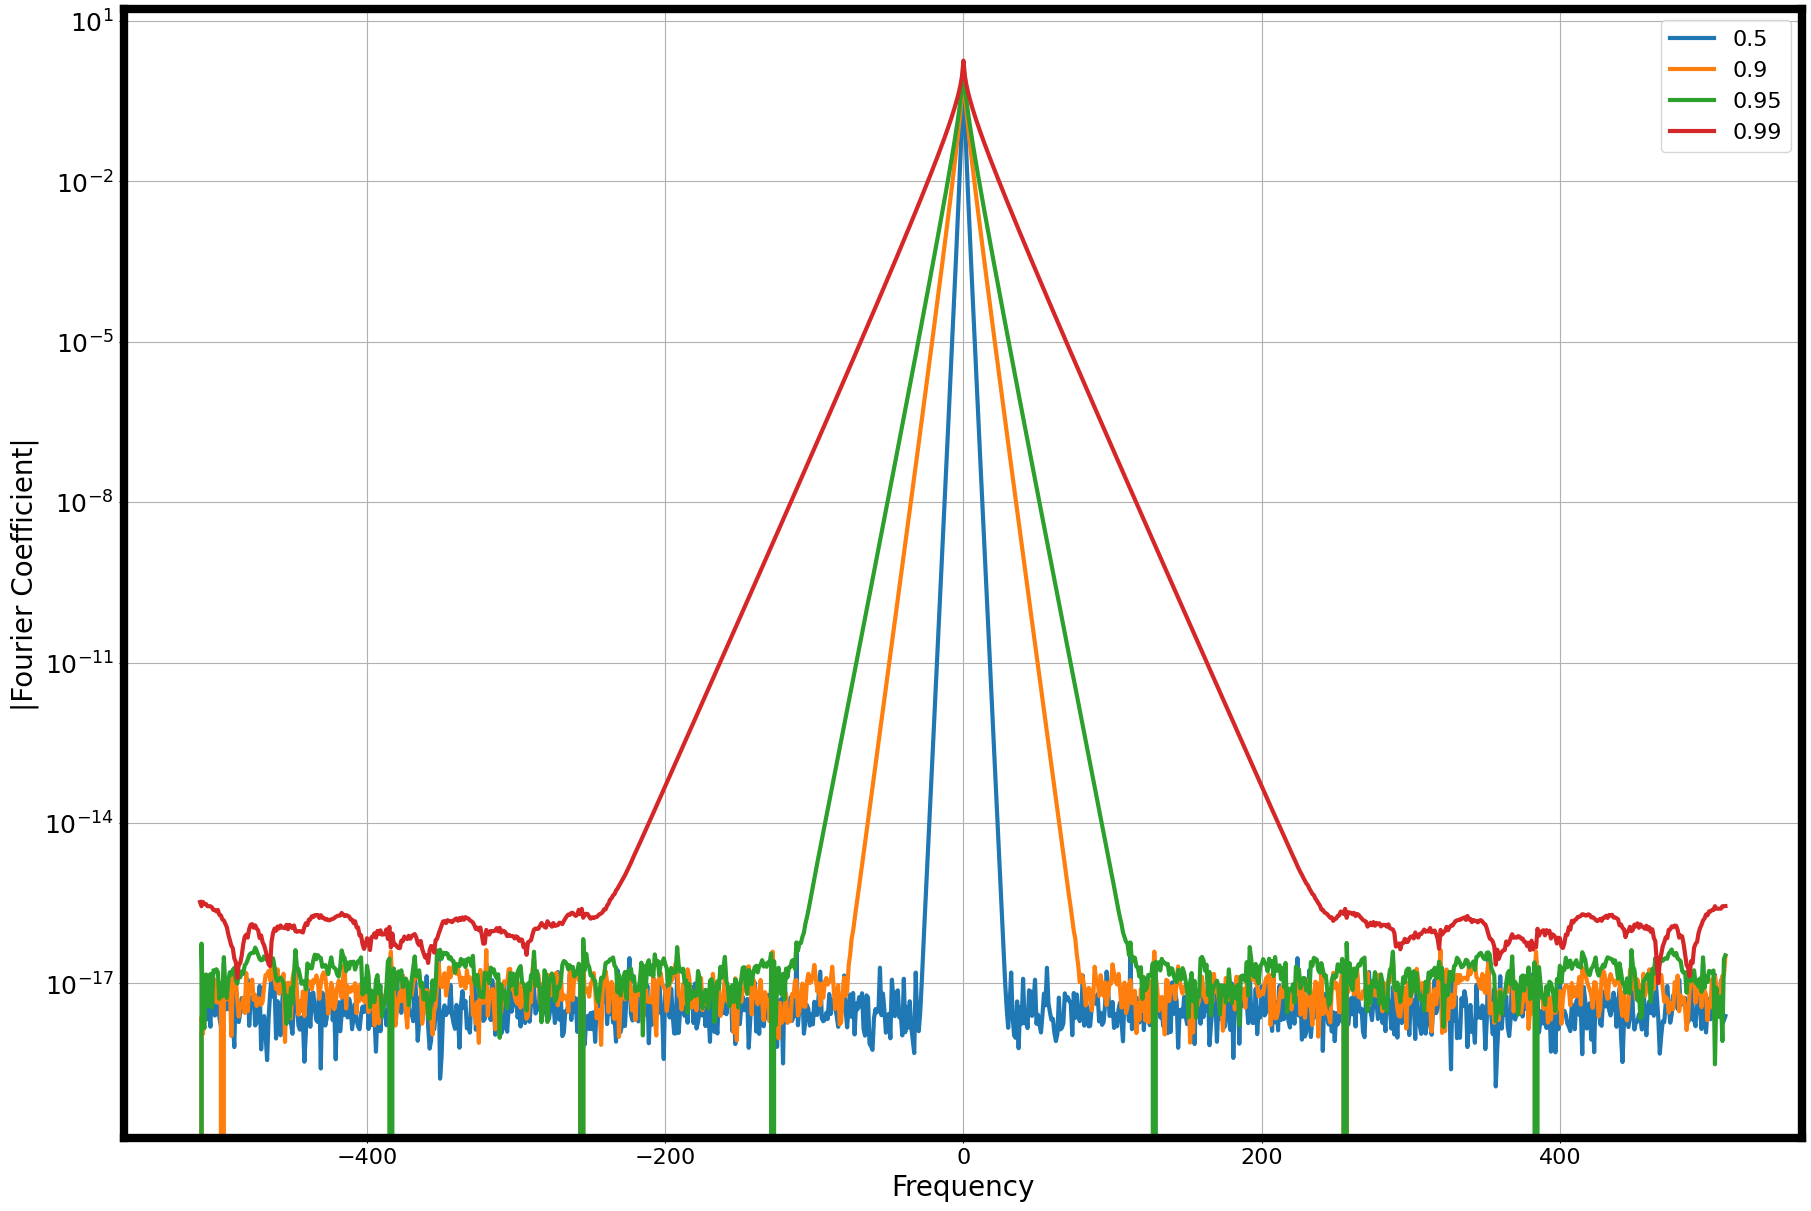

In [27]:

import numpy as np
import matplotlib.pyplot as plt

def evaliptrig(y,N):
    n = len(y)
    if (n%2) == 0: 
       c = np.fft.ifft(y)
       a = np.zeros(N, dtype=complex)
       a[:n//2] = c[:n//2]
       a[N-n//2:] = c[n//2:]
       v = np.fft.fft(a)
       return v
    else: raise(TypeError, 'odd length')


def convtrig(f,N=2**15,nmax=1+2**7):
    tt = np.linspace(0,1,N,endpoint=False) # reference points to evaluate
    fv = f(tt) # evaluate into reference points
        
    n = 2
    vlinf = []
    vn = []
    while n < nmax:
        t = np.linspace(0,1,n,endpoint=False ) # interpolation points
        y = f(t) # evaluate the function there
        # evaluate the trig. interpolant in N points
        v = np.real(evaliptrig(y,N)) # only real functions
        d = abs(v-fv); linf = d.max() 
        vlinf += [linf]
        vn += [n]
        n += 4
    return vn, vlinf

    

params = [0.5, 0.9, 0.95, 0.99]

for alpha in params:
    lab = str(alpha)
    print(lab)
    f = lambda t: 1./np.sqrt(1- alpha*np.sin(2*np.pi*t) )
    vn, vlinf = convtrig(f)
    plt.semilogy(vn, vlinf,'-',label=lab)
    
# Setting the fontsize of the axis label to 20
plt.ylabel('$L^{\infty}$ error', fontsize=20)
plt.xlabel('|Number of samples|', fontsize=20)    
plt.legend()
plt.grid()
plt.show()


for alpha in params:
    lab = str(alpha)
    print(lab)
    f = lambda t: 1./np.sqrt(1- alpha*np.sin(2*np.pi*t) )
    N = 2**10
    tt = np.linspace(0,1,N,endpoint=False) # reference points to evaluate
    fv = f(tt) # evaluate into reference points
    fvhat = np.fft.ifft(fv)
    plt.semilogy(np.arange(N)-N/2,abs(np.fft.fftshift(fvhat)), label=lab)

# Setting the fontsize of the axis label to 20
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('|Fourier Coefficient|', fontsize=20)
plt.legend()
plt.grid()
plt.show()


In [28]:
import numpy as np
from numpy import fft, zeros, pi
from collections.abc import Callable, Awaitable

def evaliptrig(y, N):
    """
    Evaluate a trigonometric interpolation polynomial on some data

    Args:
        y (np.array): input data, len must be even
        N (int): number of evaluation points of the interpolated poly

    Returns:
        np.array: evaluated values of the interpolation
    """
    n = len(y)
    if(n % 2 != 0):
        raise ValueError("y must be of even length")
    max_pos_freq = n // 2
    
    
    c = fft.ifft(y) 
    a = zeros(N, dtype=complex)
    a[:max_pos_freq] = c[:max_pos_freq]
    a[N - max_pos_freq:] = c[max_pos_freq:]
    
  
    v =fft.fft(a)
    return v
    
    
def evaliDtrig(y, N):
    """
    Evaluate a trigonometric interpolation polynomial of the derivate of some data

    Args:
        y (np.array): input data, len must be even
        N (int): number of evaluation points of the interpolated poly

    Returns:
        np.array: evaluated values of the interpolation
    """
    n = len(y)
    if(n % 2 != 0):
        raise ValueError("y must be of even length")
    max_freq = n // 2
    c = np.fft.ifft(y)
    freqs = np.fft.fftshift(np.arange(-max_freq, max_freq))
    
    dv = (
        -2 * np.pi * 1j * freqs * c
    )
    
    # perform zero padding
    a = np.zeros(N, dtype=complex)
    a[:max_freq] = dv[:max_freq]
    a[N - max_freq :] = dv[max_freq:]
    
    v = np.fft.fft(a)
    return v
    
    
def compute_convergence(a, b, fn, dfn, n_eval, n_convergence):
    """
    Computes the convergence of a trigonometric interpolation polynomial to the true value of the function or the derivate

    Args:
        a (float): left interval limit
        b (float): right interval limit
        fn (Callable[[np.array], np.array]): function of which to compute the derivate
        dfn (Callable[[np.array], np.array]) | None: exact derivate. If None computes the convergence to the function, else to this function
        n_eval (int): number of evaluations points, must be >= 2**n_convergence
        n_convergence (int): convergence will be evaluate at 2**np.arange(1,n_convergence+1) approx points

    Returns:
        np.array: l2 norm of the error of the evaluation at np.linspace(a, b, n_eval, endpoint=False)
    """
    if(n_eval < 2**n_convergence):
      raise ValueError("Eval must be large enough")

    # calculate exact solution for the finest grid
    xx = np.linspace(a, b, n_eval, endpoint=False)
    if dfn is None:
        fv = fn(xx)
    else:
        fv = dfn(xx)

    # iterate over grid densities:
    # calculate exact solutions on less dense grids,
    # interpolate to finest grid and find l2 norm of the errors
    ns = 2 ** np.arange(1, n_convergence + 1)
    norms = np.zeros(n_convergence)
    for i, n in enumerate(ns):
        t = np.linspace(a, b, n, endpoint=False)
        y = fn(t)
        if dfn is None:
            v = np.real(evaliptrig(y, n_eval))
        else:
            v = np.real(evaliDtrig(y, n_eval))
        norms[i] = np.linalg.norm(v - fv) / np.sqrt(n_eval)
    return norms




C:\Users\Admin\AppData\Local\Temp\ipykernel_13232\539744397.py:55: UserWarning: The figure layout has changed to tight
  tight_layout()


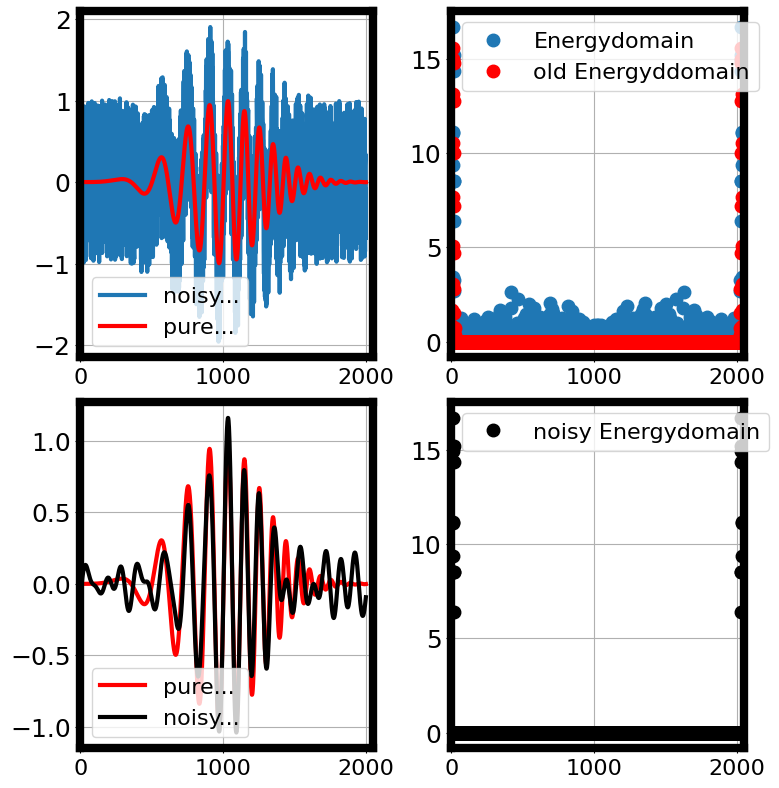

In [29]:
from numpy import *
from numpy.random import random
from matplotlib.pyplot import *
import numpy.fft as fft

# signal
f = lambda x: sin((x / 200) ** 2) * exp(-((x - 1E3) / 400) ** 2)
# where we sample:
N = 2 ** 11
x = linspace(0, 2000, N, endpoint=False)
# samples:
fx = f(x)
# add the random numbers to get the signal
y = fx + 2 * random(N) - 1
r = 0.25
# power spectrum
yh = fft.fft(y)
py = (abs(yh) ** 2)/N
pfx = ( abs(fft.fft(fx))**2 )/N
# how high is the power spectrum:
pymax = py.max()
fyh = where(py > r*pymax, yh, 0.)
# filtered signal
fy = real(fft.ifft(fyh))
pfy = ((abs(fyh))**2)/N

figure(figsize=(8, 8))
subplot(221)
plot(x, y, label='noisy...') # original noisy signal 
plot(x, fx, 'r', label='pure...') # pure signal
xlim(0, N)
grid(True)
legend(loc='lower left')

subplot(222)
plot(py,'.', label='Energydomain')
plot(pfx,'r.', label='old Energyddomain')
xlim(0, N)
grid(True)
legend(loc='upper left')

subplot(224)
plot(pfy,'k.', label='noisy Energydomain')
xlim(0, N)
grid(True)
legend(loc='upper left')

subplot(223)
plot(x, fx,'r-', label='pure...')
plot(x, fy, 'k-',label='noisy...')
xlim(0, N)
grid(True)
legend(loc='lower left')

tight_layout()
plt.show()



##### **DFT and Chebyshev Interpolation**

We have already seen in previous chapters that Chebyshev Interpolation is good when interpolating smooth functions. We have seen a method to compute the Chebyshev Coefficients in O(n^2) but with the help of Fouriertransform we can reduce that complexity. To remind ourselves again the Chebyshev Nodes tk are given by, f(tk)= p(tk):

![DFTCheby1](Images/Chapter2-DFTCheby1.PNG)

We define two helper functions and show that Chebyshev Interpolation is a Trigonometric Polynomial

![DFTCheby2](Images/Chapter2-DFTCheby2.PNG)

![DFTCheby3](Images/Chapter2-DFTCheby3.PNG)

![DFTCheby4](Images/Chapter2-DFTCheby4.PNG)

One can also consider that extrema points of the polynomial Tn since they also include the zero points. The Chebyshev Extrema are given by:

![DFTCheby5](Images/Chapter2-DFTCheby5.PNG)

To calculate the Chebyshev COefficients on these new points we use the following Formula:

![DFTCheby6](Images/Chapter2-DFTCheby6.PNG)

This leads to a way easier FFT implementation that runs in O(nlogn).




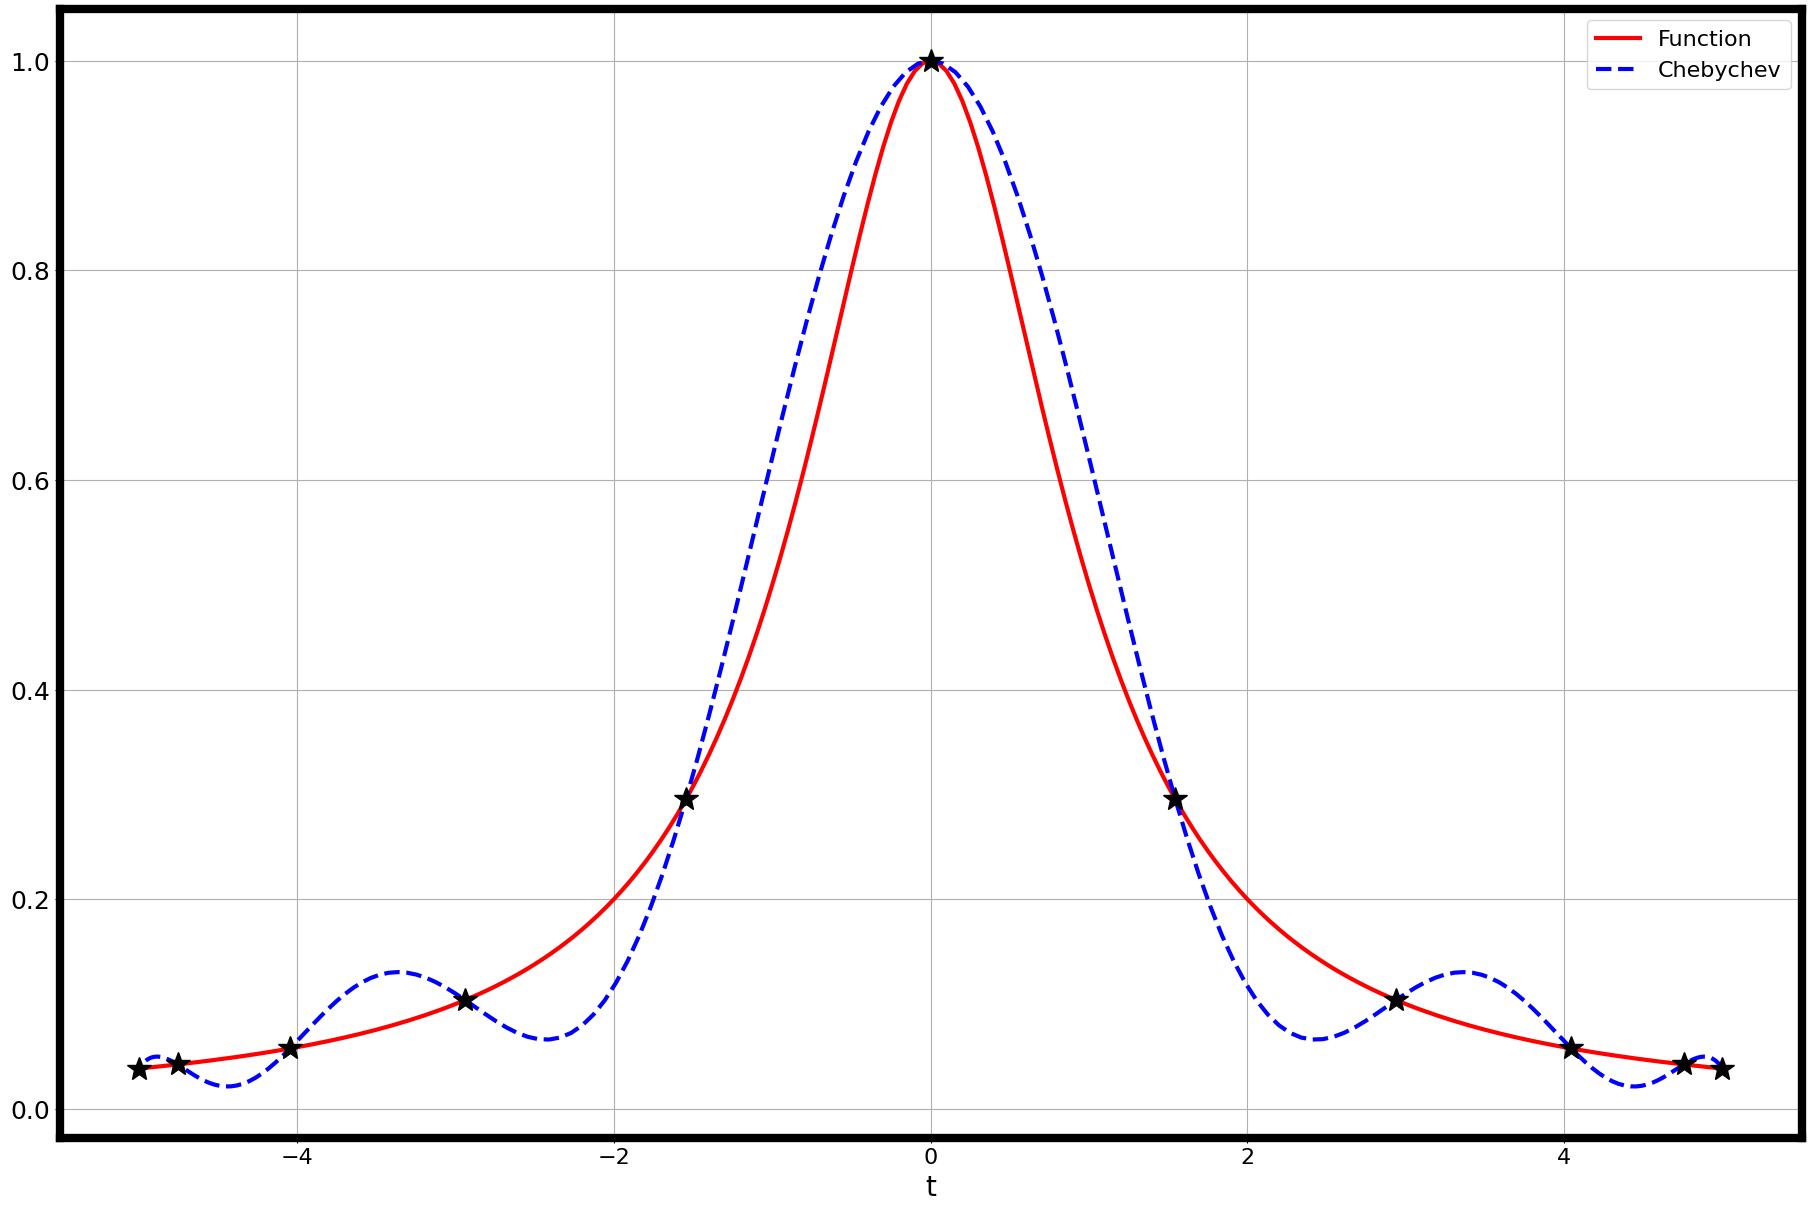

In [30]:
from scipy.fft import ifft, fft

def chebexp(y):
    r"""Efficiently compute coefficients $\alpha_j$ in the Chebyshev expansion
    $p = \sum\limits_{j=0}^{n}\alpha_j T_j$ of $p\in\Cp_n$ based on values $y_k$,
    $k=0,\ldots,n$, in Chebyshev abscissas $t_k$, $k=0,\ldots,n$. These values
    are
    passed in the row vector y
    """

# degree of polynomial  
    n = y.shape[0]-1
    z = zeros(2*n, dtype=complex)
    z[:n+1] = 1.*y
    z[n+1:] = flipud(y)[1:-1]
    c = fft(z)/(2.*n)
    a = 1.*c[:n+1]
    a[0] *= 0.5
    a[-1] *= 0.5
    return a

def evalchebexp(a,N):
    n = a.shape[0]-1
    c = zeros(2*N, dtype=complex)
    c[:n+1] = 1.*a
    c[0] *= 2
    c[n] *= 2
    c[2*N-n+1:] = c[n-1:0:-1]
    z = ifft(c)*2*N
    y = 1.*z[:N+1]
    x = cos(arange(N+1)*pi/N)
    return x,y

def rungef(x):
    """Compute the value of the function of Runge's counterexample.
    """
    return 1.0 / (1.0 + x**2)

def step(x):
    return where(abs(x-0.5)<0.25, 1., 0.)
def ramp(x):
    return where(x<1., x, 0.)
def hat(x):
    return where(abs(x)<=1.,1-abs(x), 0.)
def morf(x):
    return where(abs(x)<=1,0.5*(1+cos(pi*x)),0.)
def smooth(x):
    return 1./sqrt(1.+0.5*sin(2*pi*x))


if __name__ == "__main__":
    f = rungef
    n = 10
    x = 5*cos(arange(n+1)*pi/n) # Chebyshev points
    y = f(x)
    c = real(chebexp(y))
    t = linspace(-5.0, 5.0, 201)
    N = 200
    xN, yN = real(evalchebexp(c,N))


from pylab import plot, legend, xlabel, show, grid
plot(t, f(t), "r")

plot(5*xN,yN,"b--")
plot(x, y, "k*")
grid(True)
legend(["Function","Chebychev"])
xlabel("t")
show()




now:  _lambdifygenerated Created with lambdify. Signature:

func(x)

Expression:

exp(-1/sin(2*pi*x)**2)

Source code:

def _lambdifygenerated(x):
    return exp(-1/sin(2*pi*x)**2)


Imported modules:

 ----

[np.float64(1.931343150510391), np.float64(0.7500694774542069), np.float64(0.5897715428622975), np.float64(0.19277455578817276), np.float64(0.03732651205155369), np.float64(0.0015776195575773295), np.float64(9.093107144851474e-06), np.float64(1.6640346377150243e-09), np.float64(7.357000808809751e-14), np.float64(1.5161085561354925e-13)]
now:  _lambdifygenerated Created with lambdify. Signature:

func(x)

Expression:

1/(sin(2*pi*x)**2 + 1)

Source code:

def _lambdifygenerated(x):
    return (sin(2*pi*x)**2 + 1)**(-1.0)


Imported modules:

 ----

[np.float64(2.2878260750610306), np.float64(0.7680364420849247), np.float64(0.2062011181195465), np.float64(0.011088369120090182), np.float64(1.8750691718079342e-05), np.float64(2.798070423938646e-11), np.float64(2.769453292177205e-14), 

<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in divide
  return exp(-1/sin(2*pi*x)**2)


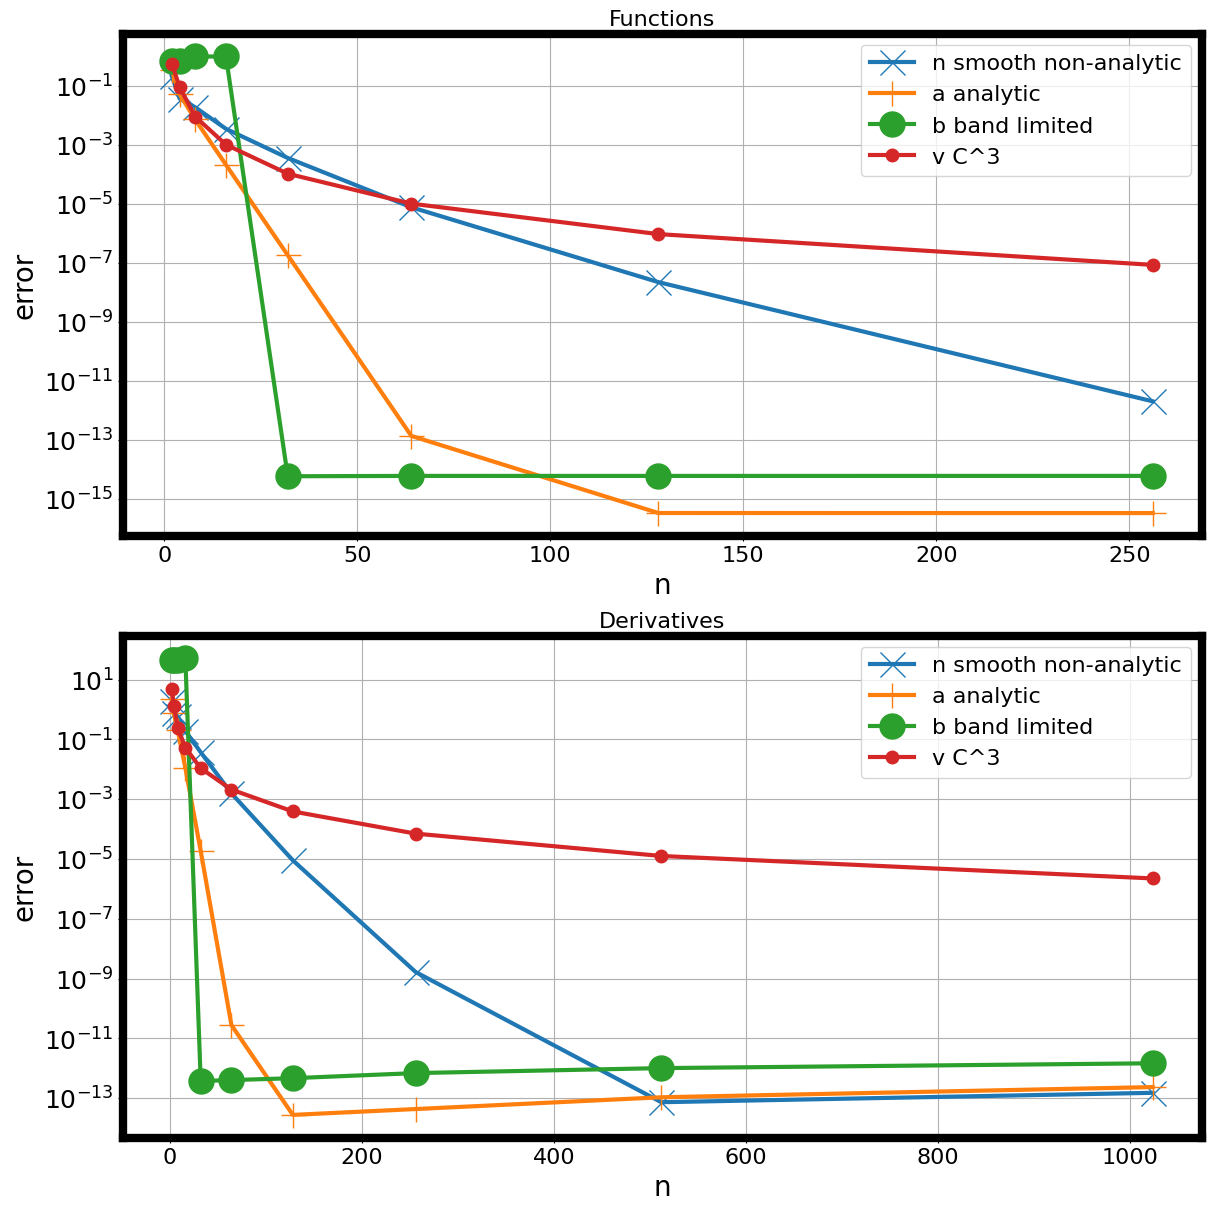

In [32]:
# set up symbolic functions
import numpy as np
import sympy as sy
x_  = sy.symbols('x') # define symbols
fn = sy.exp(-1/sy.sin(2*sy.pi*x_)**2) # smooth but not analytic
fa = 1/(1+sy.sin(2*sy.pi*x_)**2) # analytic in a strip in complex plane
fb = sy.sin(2*sy.pi*10*x_) # band limted

# make them and their derivatives usable with numpy
syfuncs = [fn, fa, fb]
def sy2np(func):
    f1 = sy.lambdify((x_), func, "numpy")
    dfunc = sy.diff(func, x_, 1) # its first derivative
    dfunc = sy.simplify(dfunc)
    df1 = sy.lambdify((x_), dfunc, "numpy")
    return f1, df1    

# sympy has dificulties with abs so here is the plain implementation
def absin3(x): # C^3 only
    return abs(np.sin(2*np.pi*x))**3
def dabsin3(x):
    return 3*2*np.pi*np.cos(2*np.pi*x)*np.sin(2*np.pi*x)*abs(np.sin(2*np.pi*x))

# a list of all functions
LofF =  list(map(sy2np,syfuncs))
LofF.append((absin3, dabsin3))


import numpy as np
from numpy import fft
import matplotlib.pyplot as plt


# evaluate a trigonometric interpolation polynomial
def evaliptrig(y,N): # y = values, N=number of points to evaluate
    n = len(y)
    if (n%2) == 0:
       n2 = n//2 # highest frequency
       c = fft.ifft(y) # use ifft instead of fft in order to avoid divisions by n
       a = np.zeros(N, dtype=complex)
       a[:n2] = c[:n2]
       a[N-n2:] = c[n2:]
       v = fft.fft(a);
       return v
    else: print('odd length')

# evaluate the derivative via trigonometric interpolation polynomial
def evalDitrig(y,N): # y = values, N=number of points to evaluate
    n = len(y)
    if (n%2) == 0:
       n2 = n//2 # highest frequency
       c = fft.ifft(y) # use ifft instad of fft in order to avoid divisions by n
       frw = fft.fftshift(np.arange(-n2,n2)) # frequencies
       dv = -2*np.pi*1j*frw*c # derivative in Fourier domain; -2*pi because used ifft
       a = np.zeros(N, dtype=complex)
       a[:n2] = dv[:n2]
       a[N-n2:] = dv[n2:]
       v = fft.fft(a);
       return v
    else: print('odd length')

# we have to set the left corner slightly larger than 0
# because the symbolic derivative of fn needs a lim at 0
a = np.finfo(float).eps 
b = 1. 
# evaluate functions or derivatives and convergence rates
def efc(f, df='None',N=2**12, lev=7):
    tt = np.linspace(a,b,N, endpoint=False) # reference points to evaluate
    if df == 'None':
        fv = f(tt) # evaluate into reference points
        worker = evaliptrig # evaluate function
    else:
        fv = df(tt) # evaluate into reference points
        worker = evalDitrig # evaluate derivative
    n = 2
    vs = []
    vlinf = []; vl2 = []; vn = []; vlinfloc = []
    while n < 1+2**lev:
        t = np.linspace(0,1,n, endpoint=False) # interpolation points
        y = f(t) # evaluate the function there
        # evaluate the trig. interpolant in N points
        v = np.real(worker(y,N)) # only real functions
        vs += [v]
        d = abs(v-fv); linf = d.max() 
        l2 = np.linalg.norm(d)/np.sqrt(N)
        linfloc = d[5*N//16:7*N//16].max()
        vlinf += [linf]; vl2 += [l2]
        vlinfloc +=[linfloc]
        vn += [n]
        n *= 2
    return (tt, fv, vs, vn, vl2, vlinf, vlinfloc)
    
 # run for convergence plots of functions
fig, ax = plt.subplots(2, figsize=(12, 12))
titles = ['n smooth non-analytic', 'a analytic','b band limited','v C^3']
fname = ['n(x)', 'a(x)', 'b(x)', 'v(x)']
marker = ['x', '+', 'o', '.'] 
k = 0
for fus in LofF:
    print('now: ',fus[0].__name__, fus[0].__doc__,'----\n')
    tt, fv, vs, vn, vl2, vlinf, vlinfloc = efc(fus[0], lev=8)
    ax[0].semilogy(vn, vl2, '-', marker=marker[k], label=titles[k])
    tt, fv, vs, vn, vl2, vlinf, vlinfloc =  efc(*fus, lev=10)
    print(vl2)
    ax[1].semilogy(vn, vl2, '-', marker=marker[k], label=titles[k])
    k += 1
print('oyt of cycle')    

ax[0].set_title('Functions')
ax[0].set_ylabel('error'); ax[0].set_xlabel('n')
ax[0].grid()
ax[1].set_title('Derivatives')
ax[1].set_ylabel('error'); ax[1].set_xlabel('n')
ax[1].grid()
ax[0].legend()
ax[1].legend()

plt.show()

1. Generating test functions with SymPy...
   ...done.

2. Starting Barycentric convergence analysis using SciPy...

--- Processing function: $f(x) = \sin(\pi x)$ ($C^\infty$, periodic) ---
working on n= 8
working on n= 16
working on n= 32
working on n= 64
working on n= 128
working on n= 256
--- Processing function: $f(x) = |\sin(\pi x)|^3$ ($C^2$, periodic, kink at $x=1$) ---
working on n= 8
working on n= 16
working on n= 32
working on n= 64
working on n= 128
working on n= 256
--- Processing function: $f(x) = 1/(1+16(x-1)^2)$ ($C^\infty$, non-periodic) ---
working on n= 8
working on n= 16
working on n= 32
working on n= 64
working on n= 128
working on n= 256


<lambdifygenerated-20>:2: RuntimeWarning: invalid value encountered in divide
  return select([equal(sin(pi*x), 0),True], [0,3*pi*sin(pi*x)**3*cos(pi*x)/abs(sin(pi*x))], default=nan)


--- Processing function: Piecewise Non-Poly ($C^1$ at $x=1$) ---
working on n= 8
working on n= 16
working on n= 32
working on n= 64
working on n= 128
working on n= 256
--- Processing function: Piecewise Non-Poly ($C^2$ at $x=1$) ---
working on n= 8
working on n= 16
working on n= 32
working on n= 64
working on n= 128
working on n= 256
   Generating plot for Barycentric Interpolation (Chebyshev Nodes)...


C:\Users\Admin\AppData\Local\Temp\ipykernel_13232\3185033639.py:77: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.96])


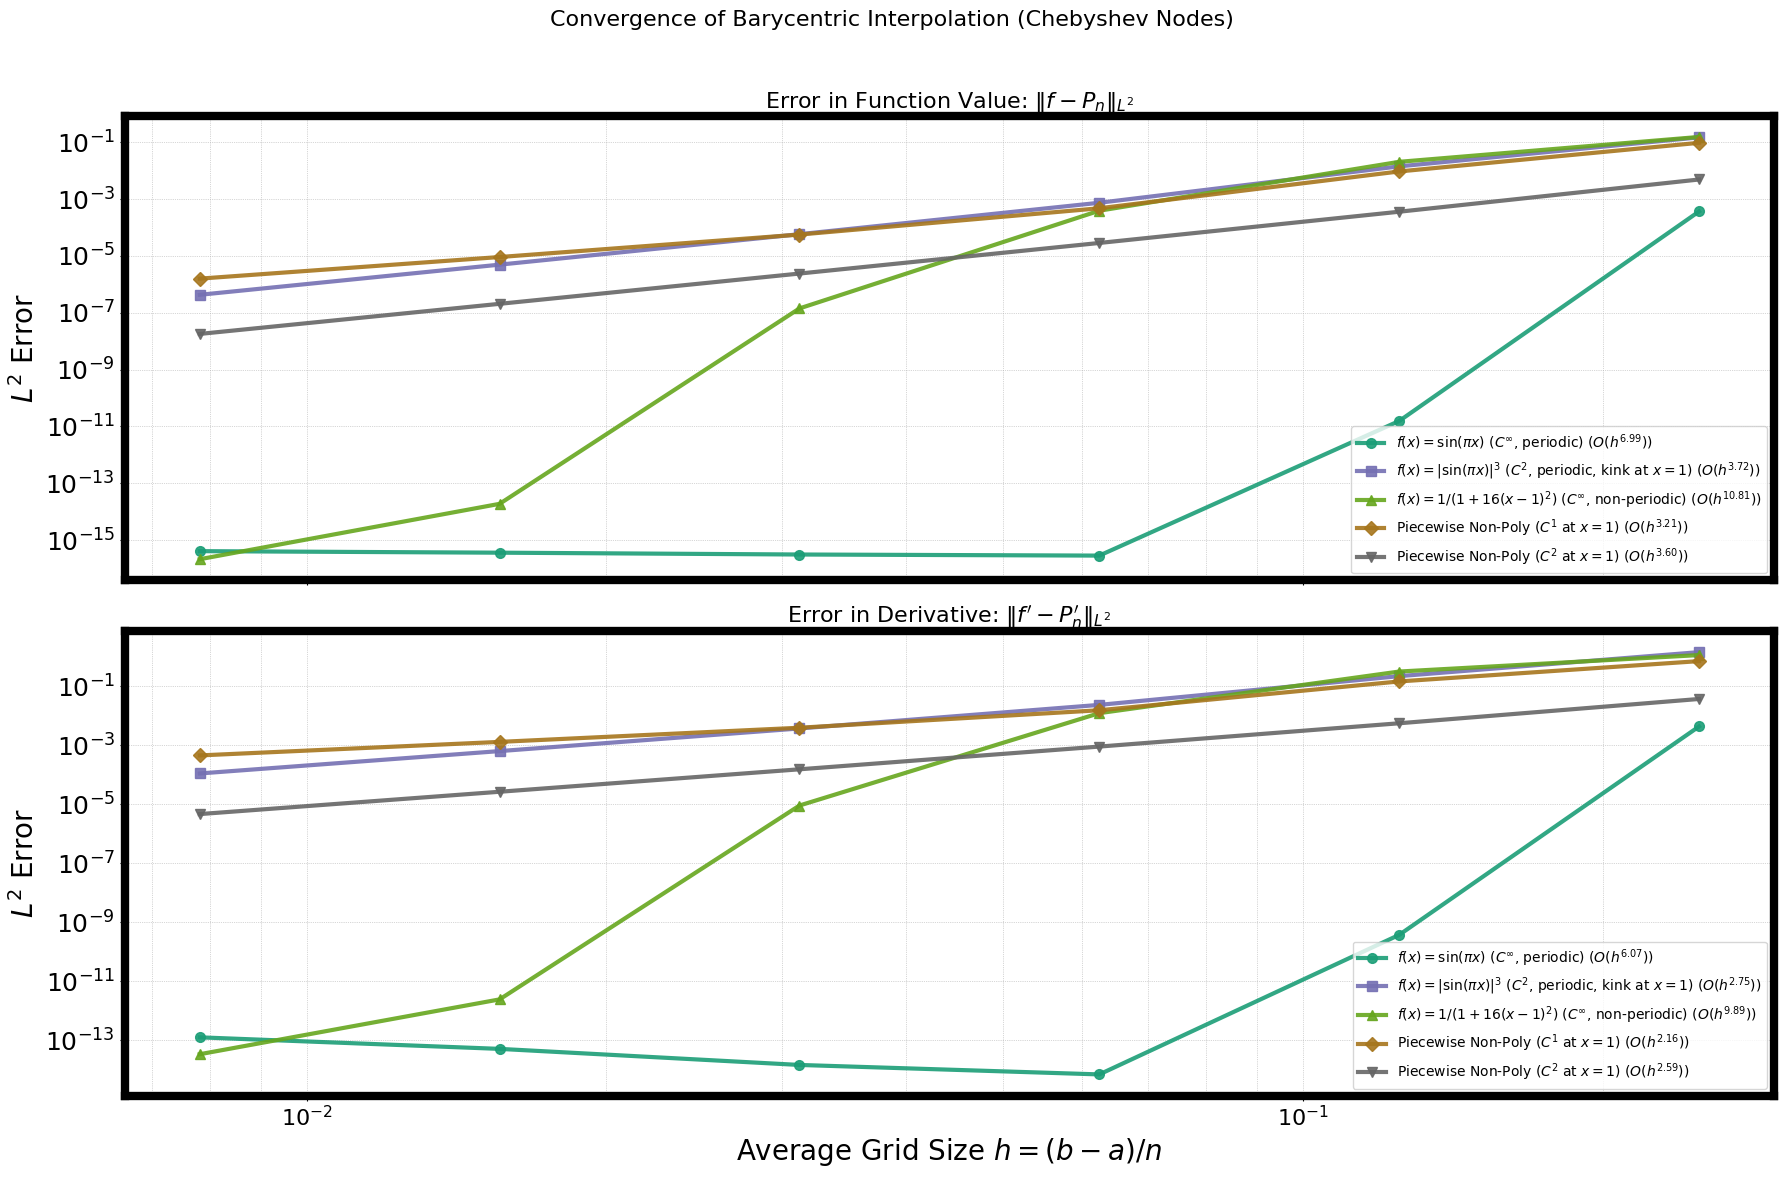

3. Analysis complete. Plot has been saved.


In [35]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable

# --- Reusable Components ---
params={'font.size': 12,
        'figure.figsize': (18, 12),
        'axes.grid': True,
        'grid.linestyle': ':',
        'axes.labelsize': 20,
        'axes.titlesize': 16,
        'legend.fontsize': 16,
        'xtick.labelsize': 16,
        'lines.markersize'  : 18,
        'axes.linewidth' : 6,
        'lines.linewidth': 3,
        'ytick.labelsize': 18,
        'text.usetex': False}
plt.rcParams.update(params)
plt.rcParams['figure.constrained_layout.use'] = True

def generate_convergence_plot_vs_h(interpolator_name,
                                   h_values,
                                   errors_f,
                                   errors_df,
                                   function_info):
    """
    Generates and saves a convergence plot of error vs. grid size h.
    """
    print(f"   Generating plot for {interpolator_name}...")
    fig, axes = plt.subplots(2, 1, sharex=True)
    fig.suptitle(f'Convergence of {interpolator_name}', fontsize=16)
    
    ax_f, ax_df = axes
    ax_f.set_title(r'Error in Function Value: $\|f - P_n\|_{L^2}$')
    ax_f.set_ylabel(r'$L^2$ Error')
    ax_f.set_xscale('log'); ax_f.set_yscale('log')
    ax_f.grid(True, which='both', linestyle=':', linewidth=0.5)
    
    ax_df.set_title(r'Error in Derivative: $\|f^\prime - P_n^\prime\|_{L^2}$')
    ax_df.set_ylabel(r'$L^2$ Error')
    ax_df.set_xlabel(r'Average Grid Size $h = (b-a)/n$') # Modified Label
    ax_df.grid(True, which='both', linestyle=':', linewidth=0.5)
    
    colors = [plt.cm.Dark2(i / (len(function_info) -1)) for i in range(len(function_info))]
    markers = ['o', 's', '^', 'D', 'v']

    for i, name in enumerate([info[2] for info in function_info]):
        h_plot = np.asarray(h_values)
        err_f_plot = np.asarray(errors_f[i])
        err_df_plot = np.asarray(errors_df[i])

        # For error ~ h^k, a log-log plot of error vs h has a slope of k.
        # This is now directly comparable to the spline plots (to come next week)
        if "C^" in name: # Functions with limited smoothness
            poly_f = np.polyfit(np.log(h_plot), np.log(err_f_plot), 1)
            k_f = poly_f[0] # The slope is now the positive rate k
            label_f = name + f' ($O(h^{{{k_f:.2f}}})$)'
        else: # C^infinity functions
            label_f = name + ' (spectral conv.)'

        ax_f.loglog(h_plot, err_f_plot, linestyle='-', marker=markers[i], 
                    label=label_f, color=colors[i], markersize=7, alpha=0.9)
        
        if "C^" in name:
            poly_df = np.polyfit(np.log(h_plot), np.log(err_df_plot), 1)
            k_df = poly_df[0] # The slope is now the positive rate k
            label_df = name + f' ($O(h^{{{k_df:.2f}}})$)'
        else: # C^infinity functions
            label_df = name + ' (spectral conv.)'

        ax_df.loglog(h_plot, err_df_plot, linestyle='-', marker=markers[i], 
                     label=label_df, color=colors[i], markersize=7, alpha=0.9)

    ax_f.legend(fontsize=10); ax_df.legend(fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    base_filename = "Barycentric_Interpolation_vs_h"
    plt.show()
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator
from typing import List, Tuple, Callable, Dict, Any

def create_test_functions( interval = (0.0, 2.0) ):
    """Constructs a set of test functions and their derivatives using SymPy."""
    print("1. Generating test functions with SymPy...")
    x = sp.Symbol('x')
    f1_sym = sp.sin(sp.pi * x)
    f1_name = r'$f(x) = \sin(\pi x)$ ($C^\infty$, periodic)'
    f2_sym = sp.Abs(sp.sin(sp.pi * x))**3
    f2_name = r'$f(x) = |\sin(\pi x)|^3$ ($C^2$, periodic, kink at $x=1$)'
    center = (interval[0] + interval[1]) / 2
    f3_sym = 1 / (1 + 16 * (x - center)**2)
    f3_name = r'$f(x) = 1/(1+16(x-1)^2)$ ($C^\infty$, non-periodic)'
    f4_left = 1 / (1 + 10*(x-1)**2)
    f4_right = (5*(x-1) + 1) * sp.exp(-5*(x-1))
    f4_sym = sp.Piecewise((f4_left, x <= 1), (f4_right, x > 1))
    f4_name = r'Piecewise Non-Poly ($C^1$ at $x=1$)'
    f5_left = sp.sin(sp.pi * x / 2)
    k = 2.5; A = 1.0
    D_poly = f5_left.subs(x, 1) - A
    C_poly = sp.diff(f5_left, x).subs(x, 1) - (-k*A)
    B_poly = (sp.diff(f5_left, x, 2).subs(x, 1) - (k**2 * A)) / 2
    f5_right = A * sp.exp(-k*(x-1)) + B_poly*(x-1)**2 + C_poly*(x-1) + D_poly
    f5_sym = sp.Piecewise((f5_left, x <= 1), (f5_right, x > 1))
    f5_name = r'Piecewise Non-Poly ($C^2$ at $x=1$)'
    
    sympy_functions = [(f1_sym, f1_name), (f2_sym, f2_name), (f3_sym, f3_name), (f4_sym, f4_name), (f5_sym, f5_name)]
    callable_functions = []
    for f_sym, name in sympy_functions:
        if name == f2_name:
            u, u_prime = sp.sin(sp.pi * x), sp.pi * sp.cos(sp.pi * x)
            df_sym = 3 * u**2 * sp.sign(u) * u_prime
        else:
            df_sym = sp.diff(f_sym, x).doit()
        df_sym = sp.simplify(df_sym)
        f_callable = sp.lambdify(x, f_sym, 'numpy')
        df_callable = sp.lambdify(x, df_sym, 'numpy')
        callable_functions.append((f_callable, df_callable, name))
    print("   ...done.\n")
    return callable_functions, interval


# -*- coding: utf-8 -*-
"""
Demonstrates the convergence of Barycentric Interpolation on Chebyshev nodes,
plotting the error against a representative grid size 'h'.

This program performs the following steps:
1. Defines the same set of five test functions with varying smoothness.
2. For each test function, it creates a SciPy BarycentricInterpolator on
   Chebyshev nodes of increasing density.
3. It defines a representative grid size h = (b-a)/n for a polynomial of
   degree n, to allow for comparison with uniform-grid methods like splines.
4. It computes the L^2 interpolation error for the function and its derivative.
5. Generates and saves an accessible log-log convergence plot of error vs. h,
   estimating the convergence rate k from the slope.
"""

import numpy as np
import sympy as sp
from scipy.interpolate import BarycentricInterpolator


def calculate_l2_error(y_true, y_approx, h_fine):
    """Approximates the L^2 norm of the error function on a fine grid."""
    return np.sqrt(h_fine * np.sum(np.nan_to_num(y_true - y_approx)**2))


def run_barycentric_analysis(function_list, interval):
    """Main driver for the Barycentric interpolation experiment."""
    a, b = interval
    
    N_fine = 2**12 # decreased to be able to run in CodeExpert; try 14 on own computer
    x_fine = np.linspace(a, b, N_fine)
    h_fine = (b - a) / (N_fine - 1)
    
    # n is the polynomial degree. The number of points is n+1.
    n_values = 2**np.arange(3, 9) # decreased to be able to run in CodeExpert; try 11 on own computer
    
    # We define h as the average grid size for comparison with other methods.
    h_values = (b - a) / n_values

    print("2. Starting Barycentric convergence analysis using SciPy...\n")
    
    all_errors_f, all_errors_df = [], []

    for f, df, fname in function_list:
        print(f"--- Processing function: {fname} ---")
        y_fine_true, dy_fine_true = f(x_fine), df(x_fine)
        current_errors_f, current_errors_df = [], []

        for n in n_values:
            print('working on n=',n)
            # 
            indofp = np.arange(n) # indices of the points
            x_cheb = a+ 0.5*(b-a)*(1+np.cos(indofp*np.pi/(n - 1)))  # Chebyshev points on [a, b]
            w_cheb = (-1.)**indofp  # Explicit formula for weights of Chebyshev points
            w_cheb[[0, -1]] *= 0.5
            y_cheb = f(x_cheb) # measurements
            interpolant = BarycentricInterpolator(x_cheb, y_cheb, wi=w_cheb)
            
            y_fine_approx = interpolant(x_fine)
            dy_fine_approx = interpolant.derivative(x_fine)
            
            current_errors_f.append(calculate_l2_error(y_fine_true, y_fine_approx, h_fine))
            current_errors_df.append(calculate_l2_error(dy_fine_true, dy_fine_approx, h_fine))
        
        all_errors_f.append(current_errors_f)
        all_errors_df.append(current_errors_df)
    
    # --- call plotting function with h_values ---
    generate_convergence_plot_vs_h(
        "Barycentric Interpolation (Chebyshev Nodes)", 
        h_values, # Pass the array of h values for the x-axis
        all_errors_f, 
        all_errors_df, 
        function_list
    )
    print("3. Analysis complete. Plot has been saved.")


if __name__ == '__main__':
    test_functions, domain_interval = create_test_functions()
    run_barycentric_analysis(test_functions, domain_interval)


1. Generating test functions with SymPy...
   ...done.

2. Starting analysis on [0.0, 2.0] with the Chebyshev Abszissen...

--- Processing function: $f(x) = \sin(\pi x)$ ($C^\infty$, periodic) ---
--- Processing function: $f(x) = |\sin(\pi x)|^3$ ($C^2$, periodic, kink at $x=1$) ---


<lambdifygenerated-40>:2: RuntimeWarning: invalid value encountered in divide
  return select([equal(sin(pi*x), 0),True], [0,3*pi*sin(pi*x)**3*cos(pi*x)/abs(sin(pi*x))], default=nan)


--- Processing function: $f(x) = 1/(1+16(x-1)^2)$ ($C^\infty$, non-periodic) ---
--- Processing function: Piecewise Non-Poly ($C^1$ at $x=1$) ---
--- Processing function: Piecewise Non-Poly ($C^2$ at $x=1$) ---
   Generating plot for Chebyshev Interpolation (Chebyshev Abszissen) on [0.0,2.0]...


C:\Users\Admin\AppData\Local\Temp\ipykernel_13232\1479069928.py:77: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.96])


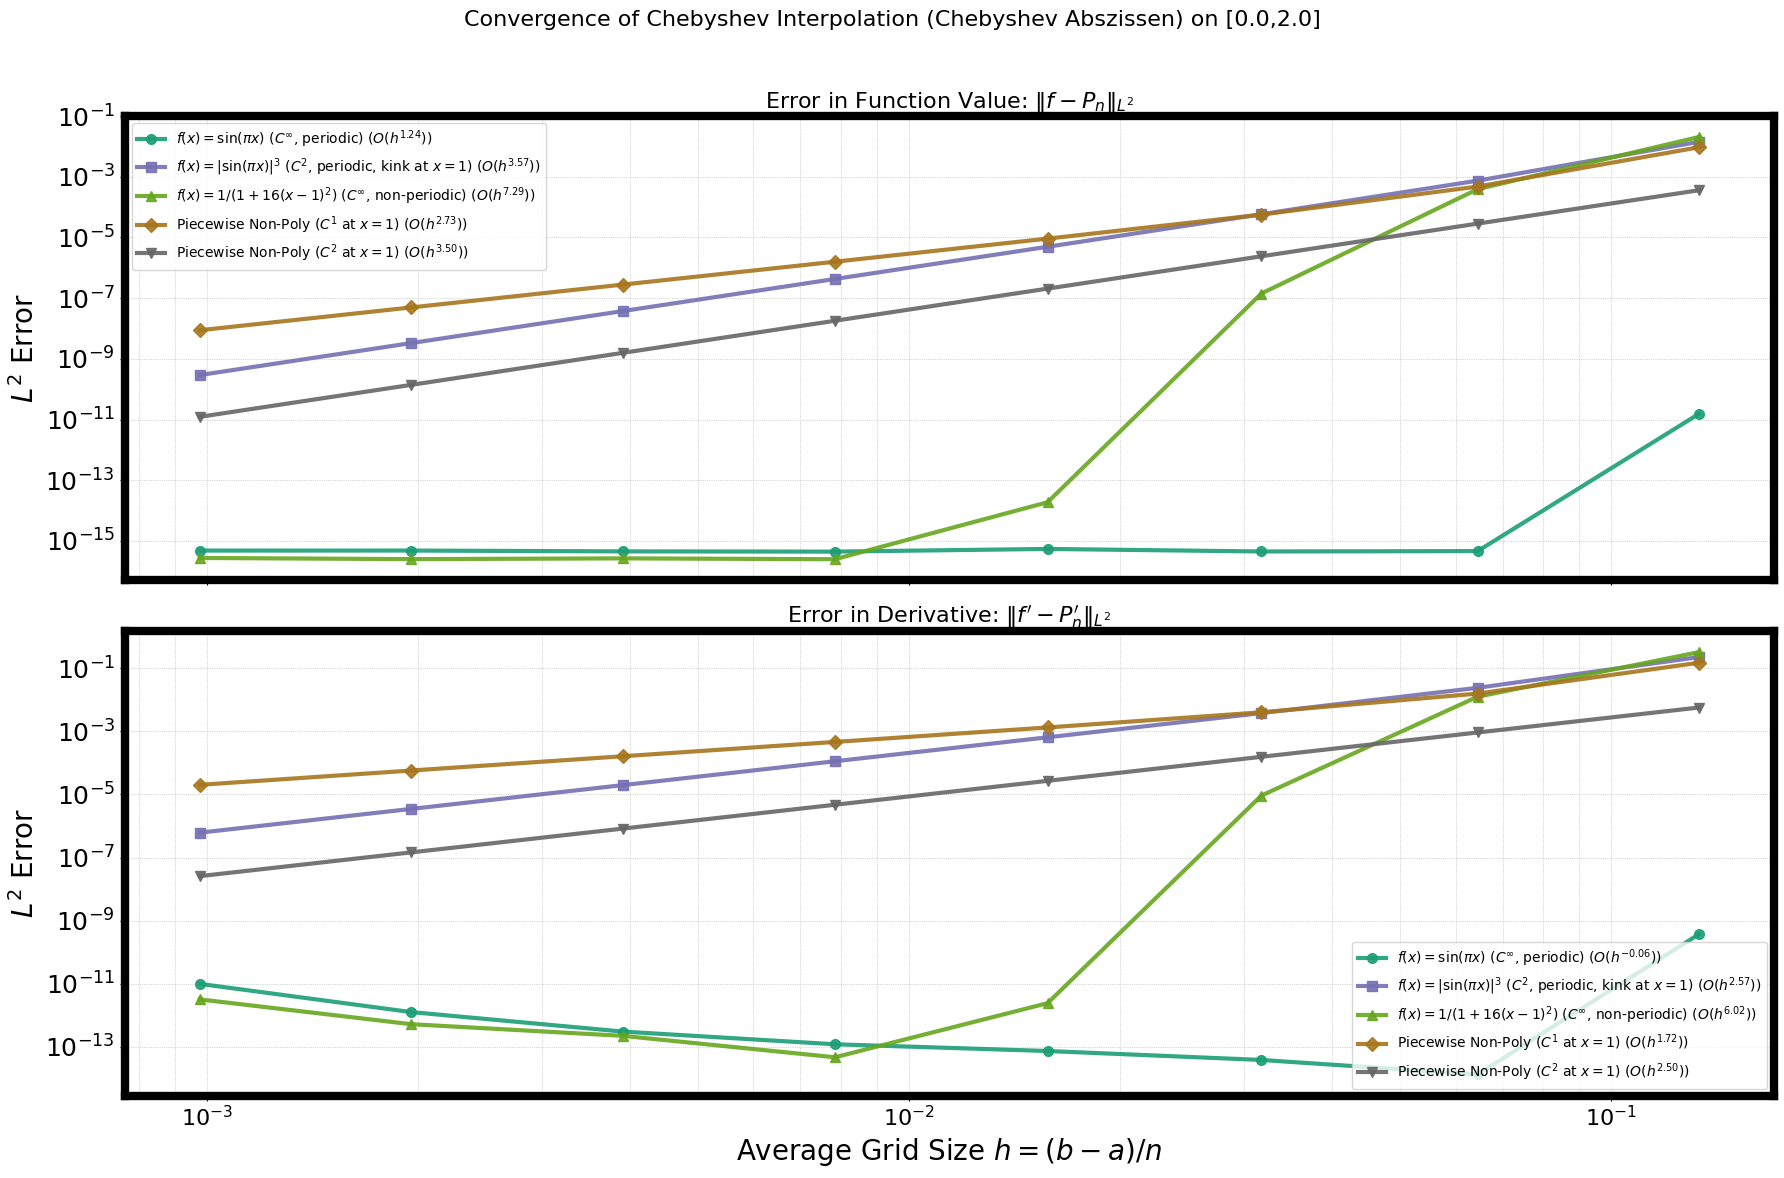

3. Analysis complete. Plot has been saved.


In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable

# --- Reusable Components ---
params={'font.size': 12,
        'figure.figsize': (18, 12),
        'axes.grid': True,
        'grid.linestyle': ':',
        'axes.labelsize': 20,
        'axes.titlesize': 16,
        'legend.fontsize': 16,
        'xtick.labelsize': 16,
        'lines.markersize'  : 18,
        'axes.linewidth' : 6,
        'lines.linewidth': 3,
        'ytick.labelsize': 18,
        'text.usetex': False}
plt.rcParams.update(params)
plt.rcParams['figure.constrained_layout.use'] = True

def generate_convergence_plot_vs_h(interpolator_name,
                                   h_values,
                                   errors_f,
                                   errors_df,
                                   function_info):
    """
    Generates and saves a convergence plot of error vs. grid size h.
    """
    print(f"   Generating plot for {interpolator_name}...")
    fig, axes = plt.subplots(2, 1, sharex=True)
    fig.suptitle(f'Convergence of {interpolator_name}', fontsize=16)
    
    ax_f, ax_df = axes
    ax_f.set_title(r'Error in Function Value: $\|f - P_n\|_{L^2}$')
    ax_f.set_ylabel(r'$L^2$ Error')
    ax_f.set_xscale('log'); ax_f.set_yscale('log')
    ax_f.grid(True, which='both', linestyle=':', linewidth=0.5)
    
    ax_df.set_title(r'Error in Derivative: $\|f^\prime - P_n^\prime\|_{L^2}$')
    ax_df.set_ylabel(r'$L^2$ Error')
    ax_df.set_xlabel(r'Average Grid Size $h = (b-a)/n$') # Modified Label
    ax_df.grid(True, which='both', linestyle=':', linewidth=0.5)
    
    colors = [plt.cm.Dark2(i / (len(function_info) -1)) for i in range(len(function_info))]
    markers = ['o', 's', '^', 'D', 'v']

    for i, name in enumerate([info[2] for info in function_info]):
        h_plot = np.asarray(h_values)
        err_f_plot = np.asarray(errors_f[i])
        err_df_plot = np.asarray(errors_df[i])

        # For error ~ h^k, a log-log plot of error vs h has a slope of k.
        # This is now directly comparable to the spline plots (to come next week)
        if "C^" in name: # Functions with limited smoothness
            poly_f = np.polyfit(np.log(h_plot), np.log(err_f_plot), 1)
            k_f = poly_f[0] # The slope is now the positive rate k
            label_f = name + f' ($O(h^{{{k_f:.2f}}})$)'
        else: # C^infinity functions
            label_f = name + ' (spectral conv.)'

        ax_f.loglog(h_plot, err_f_plot, linestyle='-', marker=markers[i], 
                    label=label_f, color=colors[i], markersize=7, alpha=0.9)
        
        if "C^" in name:
            poly_df = np.polyfit(np.log(h_plot), np.log(err_df_plot), 1)
            k_df = poly_df[0] # The slope is now the positive rate k
            label_df = name + f' ($O(h^{{{k_df:.2f}}})$)'
        else: # C^infinity functions
            label_df = name + ' (spectral conv.)'

        ax_df.loglog(h_plot, err_df_plot, linestyle='-', marker=markers[i], 
                     label=label_df, color=colors[i], markersize=7, alpha=0.9)

    ax_f.legend(fontsize=10); ax_df.legend(fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    base_filename = "Chebyshev_A"
    plt.show()

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator
from typing import List, Tuple, Callable, Dict, Any

def create_test_functions( interval = (0.0, 2.0) ):
    """Constructs a set of test functions and their derivatives using SymPy."""
    print("1. Generating test functions with SymPy...")
    x = sp.Symbol('x')
    f1_sym = sp.sin(sp.pi * x)
    f1_name = r'$f(x) = \sin(\pi x)$ ($C^\infty$, periodic)'
    f2_sym = sp.Abs(sp.sin(sp.pi * x))**3
    f2_name = r'$f(x) = |\sin(\pi x)|^3$ ($C^2$, periodic, kink at $x=1$)'
    center = (interval[0] + interval[1]) / 2
    f3_sym = 1 / (1 + 16 * (x - center)**2)
    f3_name = r'$f(x) = 1/(1+16(x-1)^2)$ ($C^\infty$, non-periodic)'
    f4_left = 1 / (1 + 10*(x-1)**2)
    f4_right = (5*(x-1) + 1) * sp.exp(-5*(x-1))
    f4_sym = sp.Piecewise((f4_left, x <= 1), (f4_right, x > 1))
    f4_name = r'Piecewise Non-Poly ($C^1$ at $x=1$)'
    f5_left = sp.sin(sp.pi * x / 2)
    k = 2.5; A = 1.0
    D_poly = f5_left.subs(x, 1) - A
    C_poly = sp.diff(f5_left, x).subs(x, 1) - (-k*A)
    B_poly = (sp.diff(f5_left, x, 2).subs(x, 1) - (k**2 * A)) / 2
    f5_right = A * sp.exp(-k*(x-1)) + B_poly*(x-1)**2 + C_poly*(x-1) + D_poly
    f5_sym = sp.Piecewise((f5_left, x <= 1), (f5_right, x > 1))
    f5_name = r'Piecewise Non-Poly ($C^2$ at $x=1$)'
    
    sympy_functions = [(f1_sym, f1_name), (f2_sym, f2_name), (f3_sym, f3_name), (f4_sym, f4_name), (f5_sym, f5_name)]
    callable_functions = []
    for f_sym, name in sympy_functions:
        if name == f2_name:
            u, u_prime = sp.sin(sp.pi * x), sp.pi * sp.cos(sp.pi * x)
            df_sym = 3 * u**2 * sp.sign(u) * u_prime
        else:
            df_sym = sp.diff(f_sym, x).doit()
        df_sym = sp.simplify(df_sym)
        f_callable = sp.lambdify(x, f_sym, 'numpy')
        df_callable = sp.lambdify(x, df_sym, 'numpy')
        callable_functions.append((f_callable, df_callable, name))
    print("   ...done.\n")
    return callable_functions, interval


# -*- coding: utf-8 -*-
"""
Convergence analysis of
Chebyshev Interpolation on a general interval [a, b], using the
Chebyshev Abscissa (extrema) method.

This definitive version corrects the final bug in the derivative calculation.
All components are now correct:
1.  Uses Chebyshev Abscissa (extrema, points of the second kind) as nodes.
2.  Correctly maps nodes from [-1, 1] to the general interval [a, b].
3.  Computes coefficients.
4.  Uses a Clenshaw algorithm for evaluation.
5.  Uses a backward recursion formula for the derivative derived from the defintion
        of the Chebyshev polynomials
"""

import numpy as np
import sympy as sp
from scipy.fft import dct


def calculate_l2_error(y_true, y_approx, h_fine):
    return np.sqrt(h_fine * np.sum(np.nan_to_num(y_true - y_approx)**2))

#
class ChebyshevAInterpolator:
    def __init__(self, y_nodes, interval):
        self.interval = interval
        self.n = len(y_nodes) - 1
        if self.n <= 0:
            self.coeffs = np.array(y_nodes)
            return

        dct_vals = dct(y_nodes, type=1)
        coeffs = dct_vals / self.n
        coeffs[0] /= 2.0
        coeffs[-1] /= 2.0
        self.coeffs = coeffs

    def _clenshaw(self, x_canonical, coeffs):
        n_coeffs = len(coeffs)
        if n_coeffs == 0: return np.zeros_like(x_canonical)
        if n_coeffs == 1: return np.full_like(x_canonical, coeffs[0])
        
        b_k_plus_1 = np.zeros_like(x_canonical, dtype=float)
        b_k_plus_2 = np.zeros_like(x_canonical, dtype=float)
        x2 = 2 * x_canonical
        
        for k in range(n_coeffs - 1, -1, -1):
            b_k = coeffs[k] + x2 * b_k_plus_1 - b_k_plus_2
            b_k_plus_2 = b_k_plus_1
            b_k_plus_1 = b_k
        
        result = b_k_plus_1 - x_canonical * b_k_plus_2
        return result

    def _chebder(self, coeffs):
        """
        Computes derivative coefficients using a backward recursion formula 
        for the derivative derived from the defintion of the Chebyshev polynomials
        """
        n = len(coeffs) - 1
        if n <= 0: return np.array([0.0])

        deriv_coeffs = np.zeros(n)
        
        if n > 0: deriv_coeffs[n-1] = 2 * n * coeffs[n]
        if n > 1: deriv_coeffs[n-2] = 2 * (n - 1) * coeffs[n-1]
        for k in range(n - 3, -1, -1):
            deriv_coeffs[k] = deriv_coeffs[k+2] + 2 * (k + 1) * coeffs[k+1]
        
        if n > 0:
            deriv_coeffs[0] /= 2.0
            
        return deriv_coeffs

    def __call__(self, x_eval):
        a, b = self.interval
        x_canonical = 2.0 * (x_eval - a) / (b - a) - 1.0
        return self._clenshaw(x_canonical, self.coeffs)

    def derivative(self, x_eval):
        a, b = self.interval
        deriv_coeffs = self._chebder(self.coeffs)
        x_canonical = 2.0 * (x_eval - a) / (b - a) - 1.0
        deriv_on_canonical = self._clenshaw(x_canonical, deriv_coeffs)
        return deriv_on_canonical * (2.0 / (b - a))


def run_analysis(function_list, interval):
    a, b = interval
    N_fine, levels = 2**14, np.arange(4, 12)
    x_fine, h_fine = np.linspace(a, b, N_fine), (b - a) / (N_fine - 1)
    
    num_points_values = 2**levels
    n_values = num_points_values - 1
    h_values = (b - a) / n_values
    
    print(f"2. Starting analysis on [{a}, {b}] with the Chebyshev Extrema...\n")
    all_errors_f, all_errors_df = [], []
    for f, df, fname in function_list:
        print(f"--- Processing function: {fname} ---")
        y_fine_true, dy_fine_true = f(x_fine), df(x_fine)
        current_errors_f, current_errors_df = [], []
        
        for n in n_values:
            num_points = n + 1
            
            j = np.arange(num_points)
            cheb_nodes_canonical = np.cos(j * np.pi / n)
            cheb_nodes_physical = a + (b - a) * (cheb_nodes_canonical + 1) / 2.0
            
            y_interp = f(cheb_nodes_physical)
            
            interpolant = ChebyshevAInterpolator(y_interp, interval)
            
            y_fine_approx = interpolant(x_fine)
            dy_fine_approx = interpolant.derivative(x_fine)
            
            current_errors_f.append(calculate_l2_error(y_fine_true, y_fine_approx, h_fine))
            current_errors_df.append(calculate_l2_error(dy_fine_true, dy_fine_approx, h_fine))
            
        all_errors_f.append(current_errors_f)
        all_errors_df.append(current_errors_df)
    
    generate_convergence_plot_vs_h( f"Chebyshev Interpolation (Chebyshev Extrema) on [{a},{b}]", h_values, all_errors_f, all_errors_df, function_list)
    print("3. Analysis complete. Plot has been saved.")

if __name__ == '__main__':
    test_interval = (0.0, 2.0)
    test_functions, domain_interval = create_test_functions(interval=test_interval)
    run_analysis(test_functions, domain_interval)


Testing DCT-I & Clenshaw  n=16

1. Values 'test_function' on 17 Chebyshev-Extrema...

2. Calculaed Coefficients `coeffs_from_vals_dct1`...
   `coeffs_from_vals_dct1` was executed.

--- NUMERISCHE RESULTS ---

Maximal Error: 9.99e-16

VERIFICATION: Successful


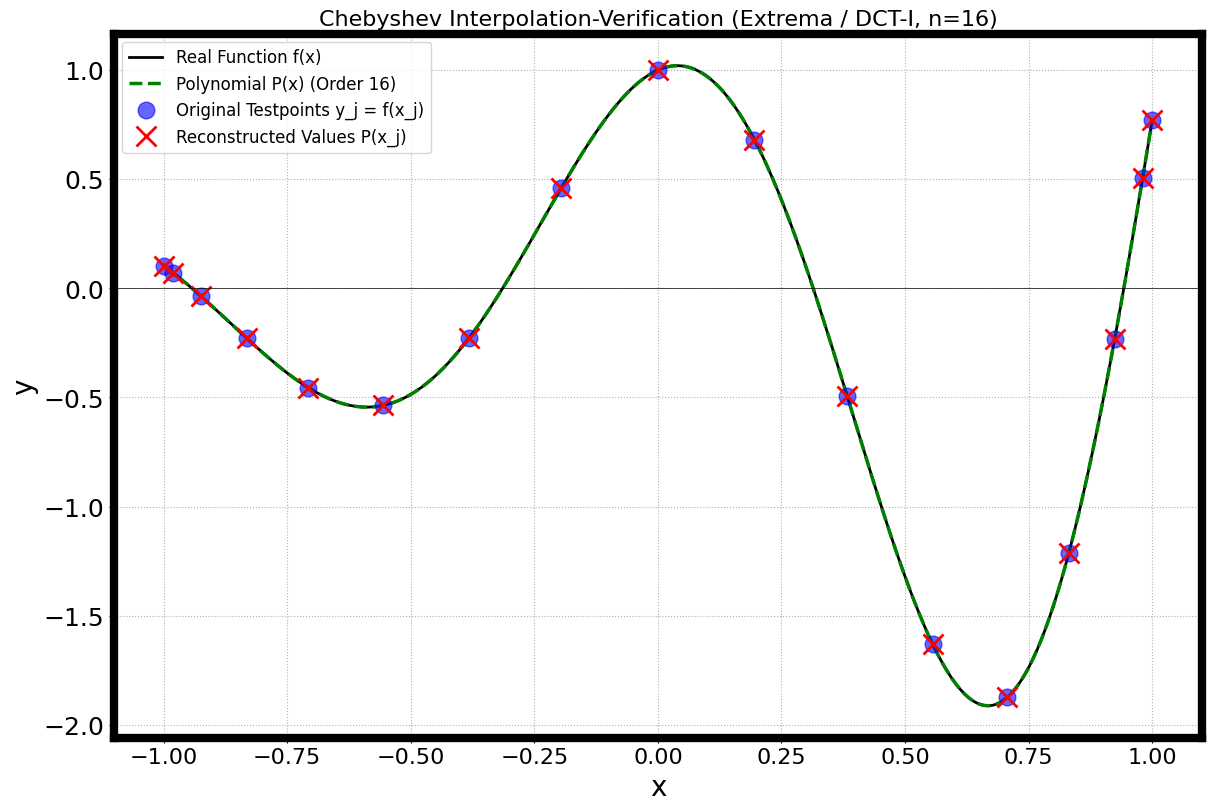

In [39]:
import numpy as np
from scipy.fft import dct
import matplotlib.pyplot as plt

def coeffs_from_vals_dct1(y_nodes):
    """
    Calculates weights via DCT1

    Args:
        y_nodes (np.ndarray): n+1 functionsvalues

    Returns:
        np.ndarray: n+1 Cheby Coefficients    
        """
    n = len(y_nodes) - 1
    if n <= 0:
        return np.array(y_nodes)
        
    
    dct_vals = dct(y_nodes, type=1)
    
   
    coeffs = dct_vals / n
    

    coeffs[0] /= 2.0
    coeffs[-1] /= 2.0
    
    return coeffs
    # ----------------------------------


def vals_from_coeffs_clenshaw(coeffs, x):
    
   
    n_coeffs = len(coeffs)
    if n_coeffs == 0: return np.zeros_like(x)
    if n_coeffs == 1: return np.full_like(x, coeffs[0])
    
    x = np.asarray(x)
    
   
    b_k_plus_1 = np.zeros_like(x, dtype=float)
    b_k_plus_2 = np.zeros_like(x, dtype=float)
    x2 = 2 * x
    
    # Rückwärts-Rekurrenz von k=n bis k=0
    for k in range(n_coeffs - 1, -1, -1):
        b_k = coeffs[k] + x2 * b_k_plus_1 - b_k_plus_2
        b_k_plus_2 = b_k_plus_1
        b_k_plus_1 = b_k
    
    # Endergebnis ist b_0 - x * b_1
    result = b_k_plus_1 - x * b_k_plus_2
    
    return result
    # ----------------------------------



def create_verification_plot(n, x_nodes, y_original, y_reconstructed, coeffs, original_func):
   
    plt.figure(figsize=(12, 8))
    
    x_fine = np.linspace(-1, 1, 500)
    y_fine_true = original_func(x_fine)
    plt.plot(x_fine, y_fine_true, 'k-', linewidth=2, label='Real Function f(x)')
    
    try:
        y_fine_interp = vals_from_coeffs_clenshaw(coeffs, x_fine)
        plt.plot(x_fine, y_fine_interp, 'g--', linewidth=2.5, label=f'Polynomial P(x) (Order {n})')
    except (TypeError, NotImplementedError):
        print("Skipped")

    plt.plot(x_nodes, y_original, 'o', color='blue', markersize=12, alpha=0.6, label='Original Testpoints y_j = f(x_j)')
    
    try:
        plt.plot(x_nodes, y_reconstructed, 'x', color='red', markersize=15, markeredgewidth=2, label='Reconstructed Values P(x_j)')
    except (TypeError, NotImplementedError):
         print("Skipped")

    plt.title(f'Chebyshev Interpolation-Verification (Extrema / DCT-I, n={n})', fontsize=16)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle=':')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.show()

if __name__ == '__main__':
   
    polynomial_degree = 16
    
    def test_function(x):
        return np.exp(x) * np.cos(5*x)

   
    n = polynomial_degree
    num_points = n + 1
    
    print("="*60)
    print(f"Testing DCT-I & Clenshaw  n={n}")
    print("="*60)
    
    print(f"\n1. Values '{test_function.__name__}' on {num_points} Chebyshev-Extrema...")
    j = np.arange(num_points)
    x_nodes = np.cos(j * np.pi / n) # Natürliche absteigende Reihenfolge
    y_original = test_function(x_nodes)
    
    print("\n2. Calculaed Coefficients `coeffs_from_vals_dct1`...")
    try:
        coeffs = coeffs_from_vals_dct1(y_original)
        if coeffs is None: raise NotImplementedError
        print("   `coeffs_from_vals_dct1` was executed.")
    except (TypeError, NotImplementedError):
        coeffs = None
        print("   `coeffs_from_vals_dct1` not impl")

    if coeffs is not None:
        try:
            y_reconstructed = vals_from_coeffs_clenshaw(coeffs, x_nodes)
            if y_reconstructed is None: raise NotImplementedError
            
           
            max_error = np.max(np.abs(y_original - y_reconstructed))
            
            print("\n--- NUMERISCHE RESULTS ---\n")
            print(f"Maximal Error: {max_error:.2e}\n")
            
            if np.allclose(y_original, y_reconstructed):
                print("VERIFICATION: Successful")
            else:
                print("VERIFICATION: Failed")
            print("="*60)
            
            create_verification_plot(n, x_nodes, y_original, y_reconstructed, coeffs, test_function)
            
        except (TypeError, NotImplementedError):
            create_verification_plot(n, x_nodes, y_original, None, None, test_function)
            


